In [1]:
# Import packages
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib as mlt

# Read and Clean Squirrel Data 

In [2]:
#read in csv file
squirrelsRAW = pd.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv", sep = ',')

#backup
squirrels_backup = pd.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv", sep = ',')



In [3]:
#preview dataframe
squirrelsRAW.head()

X          Y Unique Squirrel ID Hectare Shift      Date  \
0 -73.956134  40.794082     37F-PM-1014-03     37F    PM  10142018   
1 -73.968857  40.783783     21B-AM-1019-04     21B    AM  10192018   
2 -73.974281  40.775534     11B-PM-1014-08     11B    PM  10142018   
3 -73.959641  40.790313     32E-PM-1017-14     32E    PM  10172018   
4 -73.970268  40.776213     13E-AM-1017-05     13E    AM  10172018   

   Hectare Squirrel Number    Age Primary Fur Color Highlight Fur Color  ...  \
0                        3    NaN               NaN                 NaN  ...   
1                        4    NaN               NaN                 NaN  ...   
2                        8    NaN              Gray                 NaN  ...   
3                       14  Adult              Gray                 NaN  ...   
4                        5  Adult              Gray            Cinnamon  ...   

    Kuks  Quaas  Moans Tail flags Tail twitches  Approaches  Indifferent  \
0  False  False  False      False         False       False        False   
1  False  False  False      False         False       False        False   
2  False  False  False      False         False       False        False   
3  False  False  False      False         False       False        False   
4  False  False  False      False         False       False        False   

   Runs from  Other Interactions                                    Lat/Long  
0      False                 NaN  POINT (-73.9561344937861 40.7940823884086)  
1      False                 NaN  POINT (-73.9688574691102 40.7837825208444)  
2      False                 NaN  POINT (-73.97428114848522 40.775533619083)  
3       True                 NaN  POINT (-73.9596413903948 40.7903128889029)  
4      False                 NaN  POINT (-73.9702676472613 40.7762126854894)  

[5 rows x 31 columns]

In [4]:
squirrelsRAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

In [5]:
squirrels = squirrelsRAW

In [6]:
# Drops unnecessary columns
del squirrels['Unique Squirrel ID']
del squirrels['Shift']
del squirrels['Date']
del squirrels['Hectare Squirrel Number']
del squirrels['Combination of Primary and Highlight Color']
del squirrels['Color notes']
del squirrels['Location']
del squirrels['Above Ground Sighter Measurement']
del squirrels['Specific Location']
del squirrels['Other Activities']
del squirrels['Other Interactions']
del squirrelsRAW['Lat/Long']

In [7]:
squirrels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    3023 non-null   float64
 1   Y                    3023 non-null   float64
 2   Hectare              3023 non-null   object 
 3   Age                  2902 non-null   object 
 4   Primary Fur Color    2968 non-null   object 
 5   Highlight Fur Color  1937 non-null   object 
 6   Running              3023 non-null   bool   
 7   Chasing              3023 non-null   bool   
 8   Climbing             3023 non-null   bool   
 9   Eating               3023 non-null   bool   
 10  Foraging             3023 non-null   bool   
 11  Kuks                 3023 non-null   bool   
 12  Quaas                3023 non-null   bool   
 13  Moans                3023 non-null   bool   
 14  Tail flags           3023 non-null   bool   
 15  Tail twitches        3023 non-null   b

In [8]:
#Clean Age
squirrels['Age'].unique()

#Replace NAs
squirrels[['Age','Primary Fur Color']] = squirrels[['Age','Primary Fur Color']].fillna('Unknown') 
squirrels['Highlight Fur Color'] = squirrels['Highlight Fur Color'].fillna("None")
# Replaces ? with Unknown
squirrels['Age'] = np.where(squirrels['Age'].str.contains('\?') == True, "Unknown", squirrels['Age'])

In [9]:
#Properly Assign Data Types
squirrels["Running"] = squirrels["Running"].astype(int)
squirrels["Chasing"] = squirrels["Chasing"].astype(int)
squirrels["Climbing"] = squirrels["Climbing"].astype(int)
squirrels["Eating"] = squirrels["Eating"].astype(int)
squirrels["Foraging"] = squirrels["Foraging"].astype(int)
squirrels["Kuks"] = squirrels["Kuks"].astype(int)
squirrels["Quaas"] = squirrels["Quaas"].astype(int)
squirrels["Moans"] = squirrels["Moans"].astype(int)
squirrels["Tail flags"] = squirrels["Tail flags"].astype(int)
squirrels["Tail twitches"] = squirrels["Tail twitches"].astype(int)
squirrels["Approaches"] = squirrels["Approaches"].astype(int)
squirrels["Indifferent"] = squirrels["Indifferent"].astype(int)
squirrels["Runs from"] = squirrels["Runs from"].astype(int)


In [10]:
squirrels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    3023 non-null   float64
 1   Y                    3023 non-null   float64
 2   Hectare              3023 non-null   object 
 3   Age                  3023 non-null   object 
 4   Primary Fur Color    3023 non-null   object 
 5   Highlight Fur Color  3023 non-null   object 
 6   Running              3023 non-null   int64  
 7   Chasing              3023 non-null   int64  
 8   Climbing             3023 non-null   int64  
 9   Eating               3023 non-null   int64  
 10  Foraging             3023 non-null   int64  
 11  Kuks                 3023 non-null   int64  
 12  Quaas                3023 non-null   int64  
 13  Moans                3023 non-null   int64  
 14  Tail flags           3023 non-null   int64  
 15  Tail twitches        3023 non-null   i

# Read and Clean Hectare Data 

In [11]:
# Read in the hectares dataset using pandas
hectare = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Hectare_Data.csv', sep = ',', usecols=[0,1,2,4,7,10,11])

# Backup
hectare_backup = hectare

# Display first few rows of data
hectare.head()

Hectare Shift      Date Sighter Observed Weather Data  \
0     01A    AM  10072018                  70º F, Foggy   
1     01A    PM  10142018               54º F, overcast   
2     01B    AM  10122018                  60º F, sunny   
3     01B    PM  10192018            59.8º F, Sun, Cool   
4     01C    PM  10132018          55° F, Partly Cloudy   

                     Other Animal Sightings  Number of sighters  \
0                           Humans, Pigeons                   1   
1                           Humans, Pigeons                   1   
2             Humans, Dogs, Pigeons, Horses                   1   
3  Humans, Dogs, Pigeons, Sparrow, Blue jay                   1   
4              Humans, Dogs, Pigeons, Birds                   1   

   Number of Squirrels  
0                    4  
1                    7  
2                   17  
3                   10  
4                   10

In [12]:
hectare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Hectare                        700 non-null    object
 1   Shift                          700 non-null    object
 2   Date                           700 non-null    int64 
 3   Sighter Observed Weather Data  681 non-null    object
 4   Other Animal Sightings         668 non-null    object
 5   Number of sighters             700 non-null    int64 
 6   Number of Squirrels            700 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 38.4+ KB


In [13]:
hectare[60:90]

Hectare Shift      Date           Sighter Observed Weather Data  \
60     05B    PM  10132018                    55° F, Partly Cloudy   
61     05C    AM  10062018               64º F, cloudy, light rain   
62     05C    PM  10102018                     77º F, Mostly sunny   
63     05D    PM  10182018                            48º F, Sunny   
64     05D    AM  10202018                           55º F, Cloudy   
65     05E    PM  10122018                            61º F, sunny   
66     05E    AM  10082018                  66º F, overcast, misty   
67     05F    AM  10072018                           71º F, Cloudy   
68     05F    PM  10072018                   80º F, Humid. Cloudy.   
69     05G    PM  10102018                       77º F Sunny humid   
70     05G    AM  10062018                    64º F, cloudy, misty   
71     05H    AM  10072018                           70º F, Cloudy   
72     05H    PM  10062018                  67º F, Cloudy, misting   
73     05I    AM  10102018                                   74º F   
74     05I    PM  10082018         65º F, dark and damp, drizzling   
75     06A    PM  10122018                           sunny, chilly   
76     06A    AM  10062018                    65º F, gray, misting   
77     06B    PM  10172018                    61º F, mostly cloudy   
78     06B    AM  10122018             58º F, partly sunny, breezy   
79     06C    AM  10072018                 68º F, Overcast. Humid.   
80     06C    PM  10202018                                   65º F   
81     06D    PM  10202018                                   65º F   
82     06D    AM  10082018                           66º F, cloudy   
83     06E    PM  10102018  77º F, Mostly sunny (humid) but lovely   
84     06F    PM  10082018                          65º F, drizzly   
85     06F    AM  10062018                           18º C, Cloudy   
86     06G    PM  10202018   61º F, Sunny. Sun starting to go down   
87     06H    AM  10082018                   66º F, overcast, damp   
88     06H    PM  10202018                          63º F, Perfect   
89     06I    AM  10062018                           65º F, cloudy   

                               Other Animal Sightings  Number of sighters  \
60                                Humans, Dogs, Birds                   1   
61  Humans, Dogs, Sparrows, Starlings, American ro...                   1   
62                                       Humans, Dogs                   1   
63                      Humans, Dogs, Sparrows, Robin                   1   
64                          Humans, Dogs, Other birds                   1   
65                                             Humans                   1   
66                                Humans, Hawks, Dogs                   1   
67                              Humans, Dogs, Pigeons                   1   
68                    Humans, Dogs, Pigeons, Tourists                   1   
69                                               Dogs                   1   
70                               Humans, little Birds                   1   
71                                       Humans, Dogs                   1   
72                                             Humans                   1   
73                                       Humans, Dogs                   1   
74                              Humans, Dogs, Pigeons                   1   
75                                Humans, Dogs, Birds                   1   
76                                       Humans, Dogs                   1   
77                                Humans, Dogs, Birds                   1   
78        Humans (Bikers, Runners), Dogs, Small birds                   1   
79                                       Humans, Dogs                   1   
80                                                NaN                   1   
81                                       Humans, Dogs                   1   
82                                       Humans, Dogs        

In [14]:
# Change column names
hectare.columns=['hectare','shift','date','weather','animal_sightings','num_sighters','num_squirrels']

In [15]:
# Print datatypes
print(hectare.dtypes)

hectare             object
shift               object
date                 int64
weather             object
animal_sightings    object
num_sighters         int64
num_squirrels        int64
dtype: object


In [16]:
# Change datatypes
hectare['hectare'] = hectare['hectare'].astype('string')
hectare['shift'] = hectare['shift'].astype('string')
hectare['date'] = pd.to_datetime(hectare['date'], format='%m%d%Y')
hectare['animal_sightings'] = hectare['animal_sightings'].astype('string')

In [17]:
hectare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   hectare           700 non-null    string        
 1   shift             700 non-null    string        
 2   date              700 non-null    datetime64[ns]
 3   weather           681 non-null    object        
 4   animal_sightings  668 non-null    string        
 5   num_sighters      700 non-null    int64         
 6   num_squirrels     700 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1), string(3)
memory usage: 38.4+ KB


In [18]:
hectare.head()

hectare shift       date               weather  \
0     01A    AM 2018-10-07          70º F, Foggy   
1     01A    PM 2018-10-14       54º F, overcast   
2     01B    AM 2018-10-12          60º F, sunny   
3     01B    PM 2018-10-19    59.8º F, Sun, Cool   
4     01C    PM 2018-10-13  55° F, Partly Cloudy   

                           animal_sightings  num_sighters  num_squirrels  
0                           Humans, Pigeons             1              4  
1                           Humans, Pigeons             1              7  
2             Humans, Dogs, Pigeons, Horses             1             17  
3  Humans, Dogs, Pigeons, Sparrow, Blue jay             1             10  
4              Humans, Dogs, Pigeons, Birds             1             10

In [19]:
# Remove tildas
hectare['weather'] = hectare['weather'].str.replace('~', '')

# Seperates weather into temperature
hectare['temperature ºF'] = np.where(hectare['weather'].str[0].str.isdigit() == True, hectare['weather'].str.rsplit(' ', 0).str.get(0), 'NaN')

# Removes 's' from end of temp and replaces with empty string
hectare['temperature ºF'] = hectare['temperature ºF'].str.replace('s','')

# Removes 'ih' from end of temp and replaces with empty string
hectare['temperature ºF'] = hectare['temperature ºF'].str.replace('ih','')

# Removes 'F' from end of temp and replaces with empty string
hectare['temperature ºF'] = hectare['temperature ºF'].str.replace('F','')

# Removes temperature range and chooses first number in range
hectare['temperature ºF'] = hectare['temperature ºF'].str.replace('-73','')
hectare['temperature ºF'] = hectare['temperature ºF'].str.replace('-78','')
hectare['temperature ºF'] = hectare['temperature ºF'].str.replace('-80','')
hectare['temperature ºF'] = hectare['temperature ºF'].str.replace('-60','')

# Removes ºF from end of temp
hectare['temperature ºF'] = hectare['temperature ºF'].str.rstrip('°')
hectare['temperature ºF'] = hectare['temperature ºF'].str.rstrip('º')

# Removes ',' from end of temp
hectare['temperature ºF'] = hectare['temperature ºF'].str.rstrip(',')

# Separates weather into condition 
hectare['weather_condition'] = np.where(hectare['weather'].str[0].str.isdigit() == True, hectare['weather'].str.rsplit(',', 1).str.get(1), hectare['weather'])

# Drops the weather column
del hectare['weather']

In [20]:
# Modify temperature and weather condition data types

# Converts weather condition to string
hectare['weather_condition'] = hectare['weather_condition'].astype('string')

# Converts temperature to int
hectare['temperature ºF'] = hectare['temperature ºF'].astype('float64')

# Print info of dataframe
hectare.info()

# Make all weather conditions lowercase
hectare['weather_condition'] = hectare['weather_condition'].str.lower()

# Trim weather conditions to remove leading and trailing spaces
hectare['weather_condition'] = hectare['weather_condition'].str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hectare            700 non-null    string        
 1   shift              700 non-null    string        
 2   date               700 non-null    datetime64[ns]
 3   animal_sightings   668 non-null    string        
 4   num_sighters       700 non-null    int64         
 5   num_squirrels      700 non-null    int64         
 6   temperature ºF     615 non-null    float64       
 7   weather_condition  641 non-null    string        
dtypes: datetime64[ns](1), float64(1), int64(2), string(4)
memory usage: 43.9 KB


In [21]:
# Make all animal_sightings lowercase
hectare['animal_sightings'] = hectare['animal_sightings'].str.lower()

In [22]:
#Silences unnecessary chained assignment errors
pd.options.mode.chained_assignment = None

#Fix issues through manual updates
#One person recorded in Celsius
hectare['temperature ºF'][85] = '64'
hectare['temperature ºF'][284] = '84'
hectare['temperature ºF'][395] = '72'
hectare['temperature ºF'][411] = '77'
hectare['temperature ºF'][621] = '55'
hectare['temperature ºF'][624] = '55'

#Used Mid of Low before number or had range
hectare['temperature ºF'][97] = '60'
hectare['temperature ºF'][148] = '50'
hectare['temperature ºF'][189] = '72'
hectare['temperature ºF'][196] = '50'
hectare['temperature ºF'][210] = '74'
hectare['temperature ºF'][244] = '50'
hectare['temperature ºF'][245] = '50'
hectare['temperature ºF'][248] = '50'
hectare['temperature ºF'][275] = '50'
hectare['temperature ºF'][292] = '50'
hectare['temperature ºF'][311] = '50'
hectare['temperature ºF'][327] = '40'
hectare['temperature ºF'][375] = '50'
hectare['temperature ºF'][383] = '70'
hectare['temperature ºF'][445] = '81'
hectare['temperature ºF'][477] = '78'
hectare['temperature ºF'][638] = '59'
hectare['temperature ºF'][645] = '40'
hectare['temperature ºF'][646] = '40'
hectare['temperature ºF'][655] = '45'

In [23]:
# Replace NAs
hectare['weather_condition'] = np.where(hectare['weather_condition'].isnull(), "Other",hectare['weather_condition'])
hectare['animal_sightings'] = np.where(hectare['animal_sightings'].isnull(), "None",hectare['animal_sightings'])
hectare['temperature ºF'] = np.where(hectare['temperature ºF'].isnull(), hectare['temperature ºF'][~np.isnan(hectare['temperature ºF'])].mean(),hectare['temperature ºF'])

# Round temperature
hectare['temperature ºF'] = round(hectare['temperature ºF'],1)

In [24]:
hectare[100:120]

hectare shift       date                       animal_sightings  \
100     07G    AM 2018-10-10         humans, dogs, birds, blue jays   
101     07G    PM 2018-10-18                                 humans   
102     07H    PM 2018-10-06                        humans, sparrow   
103     07I    AM 2018-10-12     humans, dogs, pigeons, small birds   
104     07I    PM 2018-10-13                                   None   
105     08A    PM 2018-10-14  humans, dogs, pigeons, mice, sparrows   
106     08B    PM 2018-10-12                                 humans   
107     08C    AM 2018-10-07                           humans, dogs   
108     08D    PM 2018-10-07                           humans, dogs   
109     08D    AM 2018-10-07                  humans, dogs, pigeons   
110     08E    AM 2018-10-13                           humans, dogs   
111     08E    PM 2018-10-08                           humans, dogs   
112     08F    PM 2018-10-12                           humans, dogs   
113     08F    AM 2018-10-14        humans, dogs, owls, small birds   
114     08G    AM 2018-10-12                                 humans   
115     08G    PM 2018-10-17            humans, dogs, horses, birds   
116     08H    PM 2018-10-14             dogs, pigeons, small birds   
117     08H    AM 2018-10-17                           humans, dogs   
118     08I    PM 2018-10-13              humans, dogs, wood thrush   
119     08I    AM 2018-10-06                           humans, dogs   

     num_sighters  num_squirrels  temperature ºF             weather_condition  
100             1              9            60.7  muggy, cloudy, slightly damp  
101             1              7            52.0                         sunny  
102             1             10            68.0                       drizzle  
103             1              0            59.0                    very windy  
104             1              8            60.7                         Other  
105             1              3            58.0                  cool & crisp  
106             1              9            60.7                 chilly, sunny  
107             1              2            68.0              overcast. humid.  
108             1              4            80.0                         sunny  
109             1              8            71.0               overcast. misty  
110             1              2            46.0                          rain  
111             1              8            60.7             cloudy, drizzling  
112             1              8            60.0                         sunny  
113             1              0            52.0                  mostly sunny  
114             1              0            60.7                         Other  
115             1              2            61.0                        breezy  
116             1              9            57.0                        cloudy  
117             1              6            50.0                         windy  
118             1              9            56.0                 partly cloudy  
119             1             12            77.0                        cloudy

In [25]:
print(hectare.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hectare            700 non-null    string        
 1   shift              700 non-null    string        
 2   date               700 non-null    datetime64[ns]
 3   animal_sightings   700 non-null    object        
 4   num_sighters       700 non-null    int64         
 5   num_squirrels      700 non-null    int64         
 6   temperature ºF     700 non-null    float64       
 7   weather_condition  700 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2), string(2)
memory usage: 43.9+ KB
None


In [26]:
# Create an array to store a flag indicator for weather (1 = sunny, 2 = rainy, 3 = cloudy, 4 = other)

weather_flag = []

for item in hectare['weather_condition']:
    if 'sun' in item:
        weather_flag.append(1)
    elif 'clear' in item:
        weather_flag.append(1)
    elif 'cloud' in item:
        weather_flag.append(3)
    elif 'fog' in item:
        weather_flag.append(3)
    elif 'overcast' in item:
        weather_flag.append(3)
    elif 'rain' in item:
        weather_flag.append(2)
    elif 'driz' in item:
        weather_flag.append(2)
    elif 'mist' in item:
        weather_flag.append(2)
    else:
        weather_flag.append(4)
        
# Add weather flag as column to dataframe
hectare['weather_flag'] = weather_flag

new_weather_condition = []

# Change weather condition
for item in hectare['weather_flag']:
    if item == 1:
        new_weather_condition.append('sunny')
    elif item == 2:
        new_weather_condition.append('rainy')
    elif item == 3:
        new_weather_condition.append('cloudy')
    else: 
        new_weather_condition.append('other')

# Reassign new_weather condition to weather_condition column
hectare['weather_condition'] = new_weather_condition

In [27]:
hectare[60:90]

hectare shift       date  \
60     05B    PM 2018-10-13   
61     05C    AM 2018-10-06   
62     05C    PM 2018-10-10   
63     05D    PM 2018-10-18   
64     05D    AM 2018-10-20   
65     05E    PM 2018-10-12   
66     05E    AM 2018-10-08   
67     05F    AM 2018-10-07   
68     05F    PM 2018-10-07   
69     05G    PM 2018-10-10   
70     05G    AM 2018-10-06   
71     05H    AM 2018-10-07   
72     05H    PM 2018-10-06   
73     05I    AM 2018-10-10   
74     05I    PM 2018-10-08   
75     06A    PM 2018-10-12   
76     06A    AM 2018-10-06   
77     06B    PM 2018-10-17   
78     06B    AM 2018-10-12   
79     06C    AM 2018-10-07   
80     06C    PM 2018-10-20   
81     06D    PM 2018-10-20   
82     06D    AM 2018-10-08   
83     06E    PM 2018-10-10   
84     06F    PM 2018-10-08   
85     06F    AM 2018-10-06   
86     06G    PM 2018-10-20   
87     06H    AM 2018-10-08   
88     06H    PM 2018-10-20   
89     06I    AM 2018-10-06   

                                     animal_sightings  num_sighters  \
60                                humans, dogs, birds             1   
61  humans, dogs, sparrows, starlings, american ro...             1   
62                                       humans, dogs             1   
63                      humans, dogs, sparrows, robin             1   
64                          humans, dogs, other birds             1   
65                                             humans             1   
66                                humans, hawks, dogs             1   
67                              humans, dogs, pigeons             1   
68                    humans, dogs, pigeons, tourists             1   
69                                               dogs             1   
70                               humans, little birds             1   
71                                       humans, dogs             1   
72                                             humans             1   
73                                       humans, dogs             1   
74                              humans, dogs, pigeons             1   
75                                humans, dogs, birds             1   
76                                       humans, dogs             1   
77                                humans, dogs, birds             1   
78        humans (bikers, runners), dogs, small birds             1   
79                                       humans, dogs             1   
80                                               None             1   
81                                       humans, dogs             1   
82                                       humans, dogs             1   
83                                             humans             1   
84                                       humans, dogs             1   
85                                       humans, dogs             1   
86                              humans, horses, birds             1   
87                                       humans, dogs             1   
88                            humans, birds, cardinal             1   
89                                               None             1   

    num_squirrels  temperature ºF weather_condition  weather_flag  
60              6            55.0            cloudy             3  
61              7            64.0             rainy             2  
62             13            77.0             sunny             1  
63              7            48.0             sunny             1  
64              4            55.0            cloudy             3  
65              6            61.0             sunny             1  
66             10            66.0             rainy             2  
67              6            71.0            cloudy             3  
68              6            80.0            cloudy             3  
69              5            77.0             other             4  
70              1            64.0             rainy             2  
71              1      

In [28]:
# Create an array to store a flag indicator for human presence (1 = present, 0 = not present)

human_flag = []

for item in hectare['animal_sightings']:
    if 'human' in item:
        human_flag.append(1)
    else:
        human_flag.append(0) 

In [29]:
# Create an array to store a flag indicator for bird presence (1 = present, 0 = not present)

bird_flag = []

for item in hectare['animal_sightings']:
    if 'bird' in item:
        bird_flag.append(1)
    elif 'duck' in item:
        bird_flag.append(1)
    elif 'blue jay' in item:
        bird_flag.append(1)
    elif 'pigeon' in item:
        bird_flag.append(1)
    elif 'robin' in item:
        bird_flag.append(1)
    elif 'hawk' in item:
        bird_flag.append(1)
    elif 'cardinal' in item:
        bird_flag.append(1)
    elif 'warbler' in item:
        bird_flag.append(1)
    elif 'chickadee' in item:
        bird_flag.append(1)
    elif 'sparrow' in item:
        bird_flag.append(1)
    elif 'geese' in item:
        bird_flag.append(1)
    elif 'falcon' in item:
        bird_flag.append(1)
    elif 'finch' in item:
        bird_flag.append(1)
    elif 'gull' in item:
        bird_flag.append(1)
    elif 'wood' in item:
        bird_flag.append(1)
    elif 'dove' in item:
        bird_flag.append(1)
    elif 'crow' in item:
        bird_flag.append(1)
    else:
        bird_flag.append(0)

In [30]:
# Create an array to store a flag indicator for dog presence (1 = present, 0 = not present)

dog_flag = []

for item in hectare['animal_sightings']:
    if 'dog' in item:
        dog_flag.append(1)
    else:
        dog_flag.append(0) 

In [31]:
# Create an array to store a flag indicator for rodent presence (1 = present, 0 = not present)

rodent_flag = []

for item in hectare['animal_sightings']:
    if 'mice' in item:
        rodent_flag.append(1)
    elif 'mouse' in item:
        rodent_flag.append(1)
    elif 'rat' in item:
        rodent_flag.append(1)
    elif 'mouse' in item:
        rodent_flag.append(1)
    elif 'chipmunk' in item:
        rodent_flag.append(1)
    else:
        rodent_flag.append(0) 

In [32]:
# Add flag indicator columns to hectare dataframe

hectare['human_flag'] = human_flag
hectare['bird_flag'] = bird_flag
hectare['dog_flag'] = dog_flag
hectare['rodent_flag'] = rodent_flag

In [33]:
hectare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hectare            700 non-null    string        
 1   shift              700 non-null    string        
 2   date               700 non-null    datetime64[ns]
 3   animal_sightings   700 non-null    object        
 4   num_sighters       700 non-null    int64         
 5   num_squirrels      700 non-null    int64         
 6   temperature ºF     700 non-null    float64       
 7   weather_condition  700 non-null    object        
 8   weather_flag       700 non-null    int64         
 9   human_flag         700 non-null    int64         
 10  bird_flag          700 non-null    int64         
 11  dog_flag           700 non-null    int64         
 12  rodent_flag        700 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(2), string(2)


In [34]:
# Drops the unneeded columns
del hectare['weather_flag']
del hectare['animal_sightings']

In [35]:
hectare.head()

hectare shift       date  num_sighters  num_squirrels  temperature ºF  \
0     01A    AM 2018-10-07             1              4            70.0   
1     01A    PM 2018-10-14             1              7            54.0   
2     01B    AM 2018-10-12             1             17            60.0   
3     01B    PM 2018-10-19             1             10            59.8   
4     01C    PM 2018-10-13             1             10            55.0   

  weather_condition  human_flag  bird_flag  dog_flag  rodent_flag  
0            cloudy           1          1         0            0  
1            cloudy           1          1         0            0  
2             sunny           1          1         1            0  
3             other           1          1         1            0  
4            cloudy           1          1         1            0

In [36]:
hectare[60:80]

hectare shift       date  num_sighters  num_squirrels  temperature ºF  \
60     05B    PM 2018-10-13             1              6            55.0   
61     05C    AM 2018-10-06             1              7            64.0   
62     05C    PM 2018-10-10             1             13            77.0   
63     05D    PM 2018-10-18             1              7            48.0   
64     05D    AM 2018-10-20             1              4            55.0   
65     05E    PM 2018-10-12             1              6            61.0   
66     05E    AM 2018-10-08             1             10            66.0   
67     05F    AM 2018-10-07             1              6            71.0   
68     05F    PM 2018-10-07             1              6            80.0   
69     05G    PM 2018-10-10             1              5            77.0   
70     05G    AM 2018-10-06             1              1            64.0   
71     05H    AM 2018-10-07             1              1            70.0   
72     05H    PM 2018-10-06             1              0            67.0   
73     05I    AM 2018-10-10             1              6            74.0   
74     05I    PM 2018-10-08             1              2            65.0   
75     06A    PM 2018-10-12             1              7            60.7   
76     06A    AM 2018-10-06             1              8            65.0   
77     06B    PM 2018-10-17             1              7            61.0   
78     06B    AM 2018-10-12             1              2            58.0   
79     06C    AM 2018-10-07             1              8            68.0   

   weather_condition  human_flag  bird_flag  dog_flag  rodent_flag  
60            cloudy           1          1         1            0  
61             rainy           1          1         1            0  
62             sunny           1          0         1            0  
63             sunny           1          1         1            0  
64            cloudy           1          1         1            0  
65             sunny           1          0         0            0  
66             rainy           1          1         1            0  
67            cloudy           1          1         1            0  
68            cloudy           1          1         1            0  
69             other           0          0         1            0  
70             rainy           1          1         0            0  
71            cloudy           1          0         1            0  
72             rainy           1          0         0            0  
73             other           1          0         1            0  
74             rainy           1          1         1            0  
75             sunny           1          1         1            0  
76             rainy           1          0         1            0  
77            cloudy           1          1         1            0  
78             other           1          1         1            0  
79            cloudy           1          0         1            0

In [37]:
squirrels.head()

X          Y Hectare      Age Primary Fur Color  \
0 -73.956134  40.794082     37F  Unknown           Unknown   
1 -73.968857  40.783783     21B  Unknown           Unknown   
2 -73.974281  40.775534     11B  Unknown              Gray   
3 -73.959641  40.790313     32E    Adult              Gray   
4 -73.970268  40.776213     13E    Adult              Gray   

  Highlight Fur Color  Running  Chasing  Climbing  Eating  Foraging  Kuks  \
0                None        0        0         0       0         0     0   
1                None        0        0         0       0         0     0   
2                None        0        1         0       0         0     0   
3                None        0        0         0       1         1     0   
4            Cinnamon        0        0         0       0         1     0   

   Quaas  Moans  Tail flags  Tail twitches  Approaches  Indifferent  Runs from  
0      0      0           0              0           0            0          0  
1      0      0           0              0           0            0          0  
2      0      0           0              0           0            0          0  
3      0      0           0              0           0            0          1  
4      0      0           0              0           0            0          0

# Descriptive Statistics

In [38]:
squirrels.describe()

X            Y      Running      Chasing     Climbing  \
count  3023.000000  3023.000000  3023.000000  3023.000000  3023.000000   
mean    -73.967184    40.780853     0.241482     0.092292     0.217665   
std       0.007726     0.010285     0.428053     0.289486     0.412726   
min     -73.981159    40.764911     0.000000     0.000000     0.000000   
25%     -73.973102    40.771676     0.000000     0.000000     0.000000   
50%     -73.968594    40.778166     0.000000     0.000000     0.000000   
75%     -73.960189    40.791219     0.000000     0.000000     0.000000   
max     -73.949722    40.800119     1.000000     1.000000     1.000000   

            Eating     Foraging         Kuks       Quaas        Moans  \
count  3023.000000  3023.000000  3023.000000  3023.00000  3023.000000   
mean      0.251406     0.474694     0.033741     0.01654     0.000992   
std       0.433893     0.499442     0.180592     0.12756     0.031492   
min       0.000000     0.000000     0.000000     0.00000     0.000000   
25%       0.000000     0.000000     0.000000     0.00000     0.000000   
50%       0.000000     0.000000     0.000000     0.00000     0.000000   
75%       1.000000     1.000000     0.000000     0.00000     0.000000   
max       1.000000     1.000000     1.000000     1.00000     1.000000   

        Tail flags  Tail twitches   Approaches  Indifferent    Runs from  
count  3023.000000    3023.000000  3023.000000  3023.000000  3023.000000  
mean      0.051274       0.143566     0.058882     0.480979     0.224281  
std       0.220592       0.350707     0.235442     0.499721     0.417177  
min       0.000000       0.000000     0.000000     0.000000     0.000000  
25%       0.000000       0.000000     0.000000     0.000000     0.000000  
50%       0.000000       0.000000     0.000000     0.000000     0.000000  
75%       0.000000       0.000000     0.000000     1.000000     0.000000  
max       1.000000       1.000000     1.000000     1.000000     1.000000

In [39]:
hectare.describe()

num_sighters  num_squirrels  temperature ºF  human_flag   bird_flag  \
count    700.000000     700.000000      700.000000  700.000000  700.000000   
mean       1.142857       4.317143       60.657143    0.908571    0.541429   
std        0.388891       3.559748        9.748335    0.288424    0.498637   
min        1.000000       0.000000       30.000000    0.000000    0.000000   
25%        1.000000       2.000000       54.000000    1.000000    0.000000   
50%        1.000000       4.000000       60.700000    1.000000    1.000000   
75%        1.000000       6.000000       67.000000    1.000000    1.000000   
max        3.000000      23.000000       84.000000    1.000000    1.000000   

         dog_flag  rodent_flag  
count  700.000000   700.000000  
mean     0.750000     0.094286  
std      0.433322     0.292435  
min      0.000000     0.000000  
25%      0.750000     0.000000  
50%      1.000000     0.000000  
75%      1.000000     0.000000  
max      1.000000     1.000000

In [40]:
# Number of days in census
unique_days = hectare['date'].unique()
print("Total counting days:",len(unique_days))

Total counting days: 11


In [41]:
# Number of countable park hectares
unique_hectares = hectare['hectare'].unique()
print("Number of Countable Park Hectares:",len(unique_hectares))

Number of Countable Park Hectares: 350


In [42]:
# Total number of squirrel sightings
total_squirrels = hectare['num_squirrels'].sum()
print("Total Number of Squirrel Sightings:",total_squirrels)

Total Number of Squirrel Sightings: 3022


In [43]:
# Total number of sighters
total_sighters = hectare['num_sighters'].sum()
print("Total Number of Sighters:",total_sighters)

Total Number of Sighters: 800


## Histograms

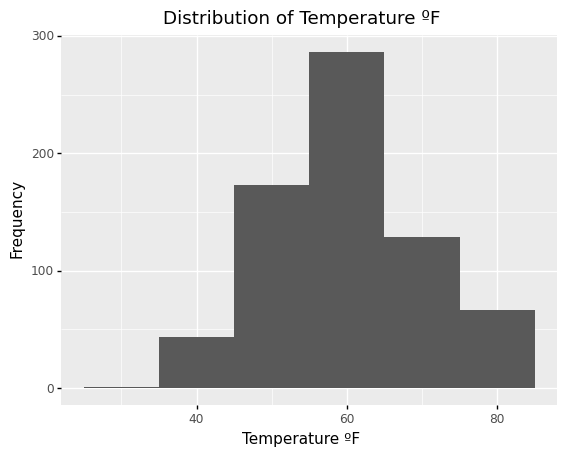

<ggplot: (299779464)>

In [44]:
hist_temp = ggplot(aes(x='temperature ºF'), data=hectare)
hist_temp + geom_histogram(binwidth=10) + labs(title="Distribution of Temperature ºF", x="Temperature ºF", y = "Frequency") # Change title and labels

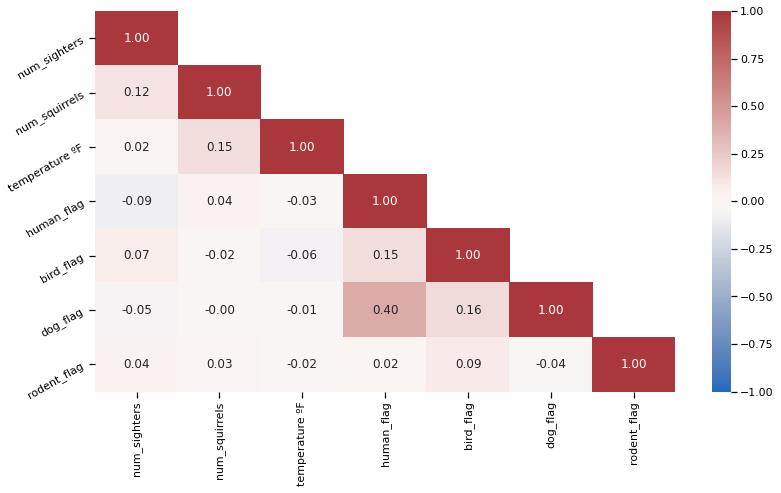

In [45]:
# Create correlation plot for squirrels portion of dataset

import seaborn as sns
corr =hectare.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f',cmap="vlag",vmin=-1, vmax=1)
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [46]:
# Remove coordinates from squirrels dataframe for correlation
squirrels_reduced = squirrels.copy()
del squirrels_reduced['X']
del squirrels_reduced['Y']

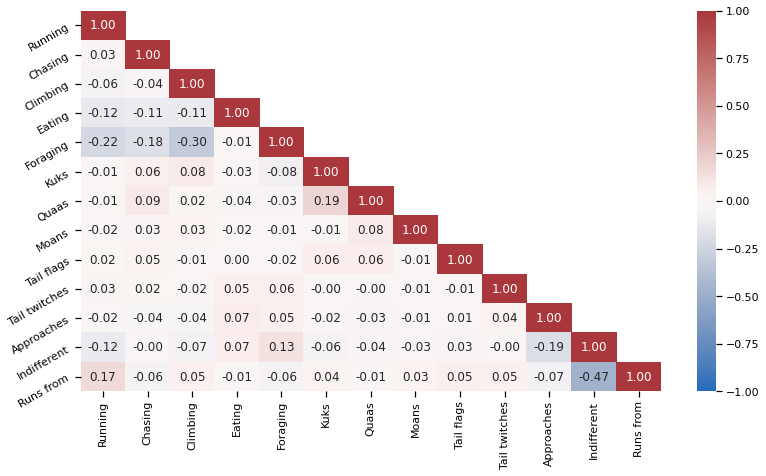

In [47]:
# Create correlation plot for hectare portion of dataset

import seaborn as sns
corr=squirrels_reduced.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))

# Create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f',cmap="vlag",vmin=-1, vmax=1)
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)


# Question 1
What are the primary visual characteristics of the squirrels? What color combinations were most popular? Were squirrels of similar markings found in a particular area of the park?

### Hectares Column

In [48]:
#Create Summary Table by Hectare in the Squirrels Table
#Column that puts hectares in lower, middle, or upper part of park and then create summary table by color
#42 Rows of Hectares = 14 in each section
squirrels['Park Area'] = np.where(squirrels['Hectare'].str.contains('14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29', case=False, regex=True), 'Middle', 'NaN')
squirrels['Park Area'] = np.where(squirrels['Hectare'].str.contains('30|31|32|33|34|35|36|37|38|39|40|41|42', case=False, regex=True), 'Upper', squirrels['Park Area'])
squirrels['Park Area'] = squirrels['Park Area'].replace('NaN', 'Lower')



In [49]:
squirrels.head()

X          Y Hectare      Age Primary Fur Color  \
0 -73.956134  40.794082     37F  Unknown           Unknown   
1 -73.968857  40.783783     21B  Unknown           Unknown   
2 -73.974281  40.775534     11B  Unknown              Gray   
3 -73.959641  40.790313     32E    Adult              Gray   
4 -73.970268  40.776213     13E    Adult              Gray   

  Highlight Fur Color  Running  Chasing  Climbing  Eating  Foraging  Kuks  \
0                None        0        0         0       0         0     0   
1                None        0        0         0       0         0     0   
2                None        0        1         0       0         0     0   
3                None        0        0         0       1         1     0   
4            Cinnamon        0        0         0       0         1     0   

   Quaas  Moans  Tail flags  Tail twitches  Approaches  Indifferent  \
0      0      0           0              0           0            0   
1      0      0           0              0           0            0   
2      0      0           0              0           0            0   
3      0      0           0              0           0            0   
4      0      0           0              0           0            0   

   Runs from Park Area  
0          0     Upper  
1          0    Middle  
2          0     Lower  
3          1     Upper  
4          0     Lower

### Primary Colors

In [50]:
#Create dataframe summarizing squirrel primary colors
primary_fur = squirrels.groupby(['Primary Fur Color'])
by_primary_fur = primary_fur.size().to_frame(name='counts')
by_primary_fur['percent'] = round(by_primary_fur['counts']/sum(by_primary_fur['counts']), 2)

by_primary_fur

counts  percent
Primary Fur Color                 
Black                 103     0.03
Cinnamon              392     0.13
Gray                 2473     0.82
Unknown                55     0.02

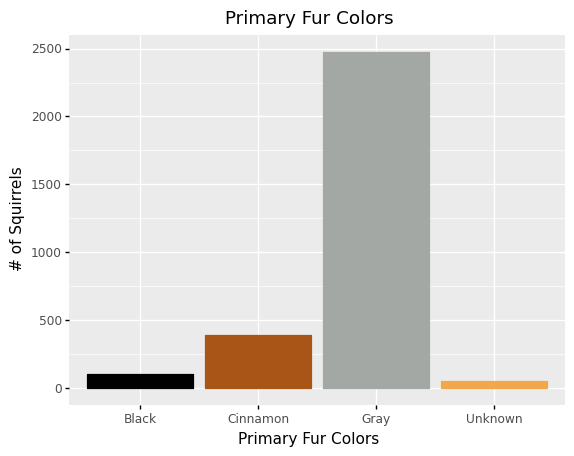

<ggplot: (299611130)>

In [51]:
#Creates Color Scales
primary_fur_colors = ['#000000','#AA5518','#A4A8A4','#f2a74b']

#Creates Bar Charts Primary Colors
(
    ggplot(squirrels) 
    + aes(x = 'Primary Fur Color', color='Primary Fur Color', fill = 'Primary Fur Color')
    + geom_bar()
    + labs(title="Primary Fur Colors", x="Primary Fur Colors", y = "# of Squirrels") # Change title and labels
    + theme(legend_position = "none") #Remove legend
    + scale_fill_manual(values=primary_fur_colors)
    + scale_color_manual(values=primary_fur_colors)
)

### Highlight Colors

In [52]:
#Create dataframe summarizing squirrel primary colors
highlight_fur = squirrels.groupby(['Highlight Fur Color'])
by_highlight_fur = highlight_fur.size().to_frame(name='counts')
by_highlight_fur['percent'] = round(by_highlight_fur['counts']/3023, 2)
by_highlight_fur

by_highlight_fur.index.name = 'highlight_fur_color'
by_highlight_fur.reset_index(inplace=True)

by_highlight_fur


highlight_fur_color  counts  percent
0                    Black      34     0.01
1          Black, Cinnamon       9     0.00
2   Black, Cinnamon, White      32     0.01
3             Black, White      10     0.00
4                 Cinnamon     767     0.25
5          Cinnamon, White     268     0.09
6                     Gray     170     0.06
7              Gray, Black       3     0.00
8              Gray, White      59     0.02
9                     None    1086     0.36
10                   White     585     0.19

In [53]:
black = by_highlight_fur[by_highlight_fur.highlight_fur_color.str.contains('Black',case=False)]
#Total sum per column: 
black.loc['Total',:]= black.sum(axis=0)
black.loc['Total','highlight_fur_color'] = 'Black'

black

highlight_fur_color  counts  percent
0                       Black    34.0     0.01
1             Black, Cinnamon     9.0     0.00
2      Black, Cinnamon, White    32.0     0.01
3                Black, White    10.0     0.00
7                 Gray, Black     3.0     0.00
Total                   Black    88.0     0.02

In [54]:
white = by_highlight_fur[by_highlight_fur.highlight_fur_color.str.contains('White',case=False)]
#Total sum per column: 
white.loc['Total',:]= white.sum(axis=0)
white.loc['Total','highlight_fur_color'] = 'White'

white

highlight_fur_color  counts  percent
2      Black, Cinnamon, White    32.0     0.01
3                Black, White    10.0     0.00
5             Cinnamon, White   268.0     0.09
8                 Gray, White    59.0     0.02
10                      White   585.0     0.19
Total                   White   954.0     0.31

In [55]:
gray = by_highlight_fur[by_highlight_fur.highlight_fur_color.str.contains('Gray',case=False)]
#Total sum per column: 
gray.loc['Total',:]= gray.sum(axis=0)
gray.loc['Total','highlight_fur_color'] = 'Gray'

gray

highlight_fur_color  counts  percent
6                    Gray   170.0     0.06
7             Gray, Black     3.0     0.00
8             Gray, White    59.0     0.02
Total                Gray   232.0     0.08

In [56]:
cinnamon = by_highlight_fur[by_highlight_fur.highlight_fur_color.str.contains('Cinnamon',case=False)]
#Total sum per column: 
cinnamon.loc['Total',:]= cinnamon.sum(axis=0)
cinnamon.loc['Total','highlight_fur_color'] = 'Cinnamon'

cinnamon

highlight_fur_color  counts  percent
1             Black, Cinnamon     9.0     0.00
2      Black, Cinnamon, White    32.0     0.01
4                    Cinnamon   767.0     0.25
5             Cinnamon, White   268.0     0.09
Total                Cinnamon  1076.0     0.35

In [57]:
#Create Merged Table
highlight_colors = pd.DataFrame()
highlight_colors = highlight_colors.append(black.loc['Total'])
highlight_colors = highlight_colors.append(white.loc['Total'])
highlight_colors = highlight_colors.append(gray.loc['Total'])
highlight_colors = highlight_colors.append(cinnamon.loc['Total'])
highlight_colors = highlight_colors.append(by_highlight_fur.loc[9])

# shift column 'Name' to first position
first_column = highlight_colors.pop('highlight_fur_color')
  
# insert column using insert(position,column_name,first_column) function
highlight_colors.insert(0, 'highlight_fur_color', first_column)

highlight_colors.reset_index(inplace=True, drop=True)
highlight_colors

highlight_fur_color  counts  percent
0               Black    88.0     0.02
1               White   954.0     0.31
2                Gray   232.0     0.08
3            Cinnamon  1076.0     0.35
4                None  1086.0     0.36

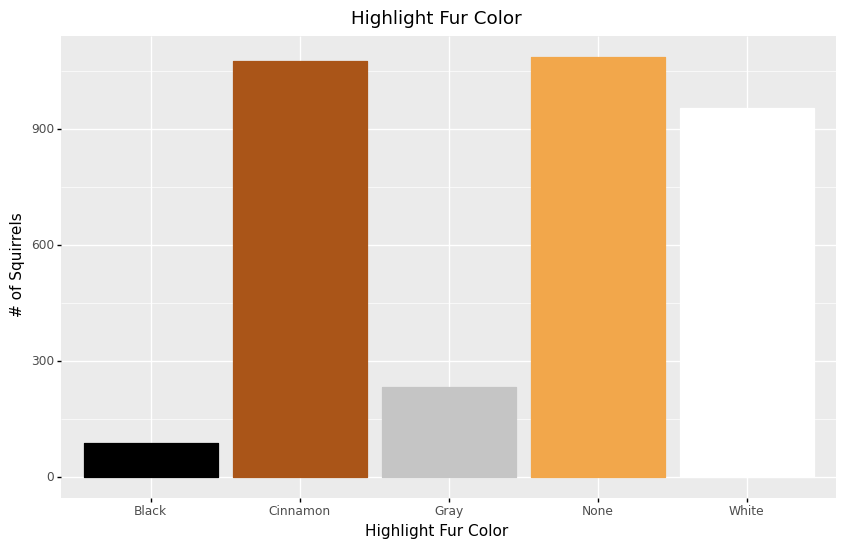

<ggplot: (299607318)>

In [58]:
#Creates Color Scales
highlight_fur_colors = ['#000000', '#AA5518','#C5C5C5', '#f2a74b', '#FFFFFF']

#Creates Bar Charts Primary Colors
(
    ggplot(highlight_colors) 
    + aes(x = 'highlight_fur_color', y = 'counts', color='highlight_fur_color', fill = 'highlight_fur_color')
    + geom_bar(stat="identity")
    + labs(title="Highlight Fur Color", x="Highlight Fur Color", y = "# of Squirrels") # Change title and labels
    + theme(legend_position = "none") #Remove legend
    + scale_fill_manual(values=highlight_fur_colors)
    + scale_color_manual(values=highlight_fur_colors)
    + theme(figure_size=(10, 6))
)

### Primary & Highlight Colors Combined

In [59]:
#Create dataframe summarizing squirrel primary colors
primary_highlight_fur = squirrels.groupby(['Primary Fur Color','Highlight Fur Color'])
by_primary_highlight_fur = primary_highlight_fur.size().to_frame(name='counts')
by_primary_highlight_fur['percent'] = round(by_primary_highlight_fur['counts']/sum(by_primary_highlight_fur['counts']), 3)

by_primary_highlight_fur.index.name = 'fur color'
by_primary_highlight_fur.reset_index(inplace=True)

by_primary_highlight_fur

Primary Fur Color     Highlight Fur Color  counts  percent
0              Black                Cinnamon      15    0.005
1              Black         Cinnamon, White       3    0.001
2              Black                    Gray       8    0.003
3              Black             Gray, White       1    0.000
4              Black                    None      74    0.024
5              Black                   White       2    0.001
6           Cinnamon                   Black      10    0.003
7           Cinnamon            Black, White       3    0.001
8           Cinnamon                    Gray     162    0.054
9           Cinnamon             Gray, Black       3    0.001
10          Cinnamon             Gray, White      58    0.019
11          Cinnamon                    None      62    0.021
12          Cinnamon                   White      94    0.031
13              Gray                   Black      24    0.008
14              Gray         Black, Cinnamon       9    0.003
15              Gray  Black, Cinnamon, White      32    0.011
16              Gray            Black, White       7    0.002
17              Gray                Cinnamon     752    0.249
18              Gray         Cinnamon, White     265    0.088
19              Gray                    None     895    0.296
20              Gray                   White     489    0.162
21           Unknown                    None      55    0.018

In [60]:
#Create table with highlight colors seperated
from itertools import chain

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

# calculate lengths of splits
lens = by_primary_highlight_fur['Highlight Fur Color'].str.split(',').map(len)

# create new dataframe, repeating or chaining as appropriate
by_primary_highlight_fur_summarized = pd.DataFrame({'Primary Fur Color': np.repeat(by_primary_highlight_fur['Primary Fur Color'], lens),
                    'Highlight Fur Color': chainer(by_primary_highlight_fur['Highlight Fur Color']),
                    'counts': np.repeat(by_primary_highlight_fur['counts'], lens),
                    'percent': np.repeat(by_primary_highlight_fur['percent'], lens)})

by_primary_highlight_fur_summarized['Highlight Fur Color'] = by_primary_highlight_fur_summarized['Highlight Fur Color'].str.strip()
by_primary_highlight_fur_summarized



Primary Fur Color Highlight Fur Color  counts  percent
0              Black            Cinnamon      15    0.005
1              Black            Cinnamon       3    0.001
1              Black               White       3    0.001
2              Black                Gray       8    0.003
3              Black                Gray       1    0.000
3              Black               White       1    0.000
4              Black                None      74    0.024
5              Black               White       2    0.001
6           Cinnamon               Black      10    0.003
7           Cinnamon               Black       3    0.001
7           Cinnamon               White       3    0.001
8           Cinnamon                Gray     162    0.054
9           Cinnamon                Gray       3    0.001
9           Cinnamon               Black       3    0.001
10          Cinnamon                Gray      58    0.019
10          Cinnamon               White      58    0.019
11          Cinnamon                None      62    0.021
12          Cinnamon               White      94    0.031
13              Gray               Black      24    0.008
14              Gray               Black       9    0.003
14              Gray            Cinnamon       9    0.003
15              Gray               Black      32    0.011
15              Gray            Cinnamon      32    0.011
15              Gray               White      32    0.011
16              Gray               Black       7    0.002
16              Gray               White       7    0.002
17              Gray            Cinnamon     752    0.249
18              Gray            Cinnamon     265    0.088
18              Gray               White     265    0.088
19              Gray                None     895    0.296
20              Gray               White     489    0.162
21           Unknown                None      55    0.018

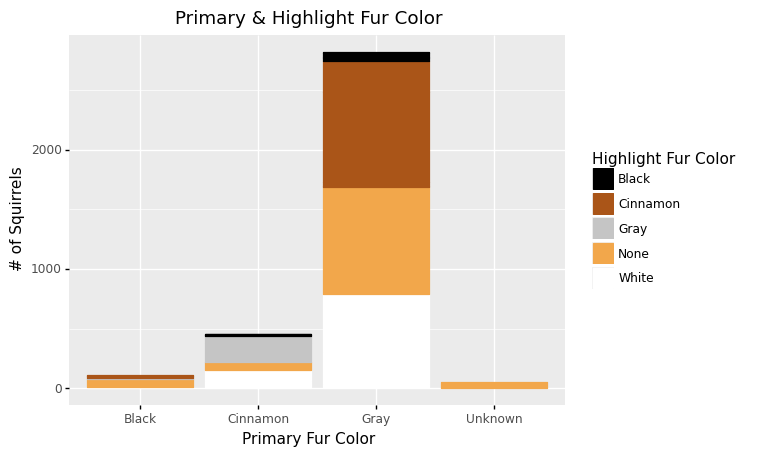

<ggplot: (299632056)>

In [61]:
#Creates Bar Charts Primary Colors

#Creates Color Scales
highlight_fur_colors = ['#000000', '#AA5518','#C5C5C5', '#f2a74b', '#FFFFFF']
(
    ggplot(by_primary_highlight_fur_summarized) 
    + aes(x = 'Primary Fur Color', y = 'counts', color='Highlight Fur Color', fill = 'Highlight Fur Color')
    + geom_bar(position="stack", stat="identity")
    + labs(title="Primary & Highlight Fur Color", x="Primary Fur Color", y = "# of Squirrels") # Change title and labels
    + scale_fill_manual(values=highlight_fur_colors)
    + scale_color_manual(values=highlight_fur_colors)
)



### Map of Fur Color

In [62]:
#Creating Bounding Box of Map
bounding_box = (-74.0078, -73.9260, 40.7607, 40.8067)
bounding_box

(-74.0078, -73.926, 40.7607, 40.8067)

In [63]:
#Load in Map Image
centralpark = plt.imread('Map/CentralPark_Map.png')

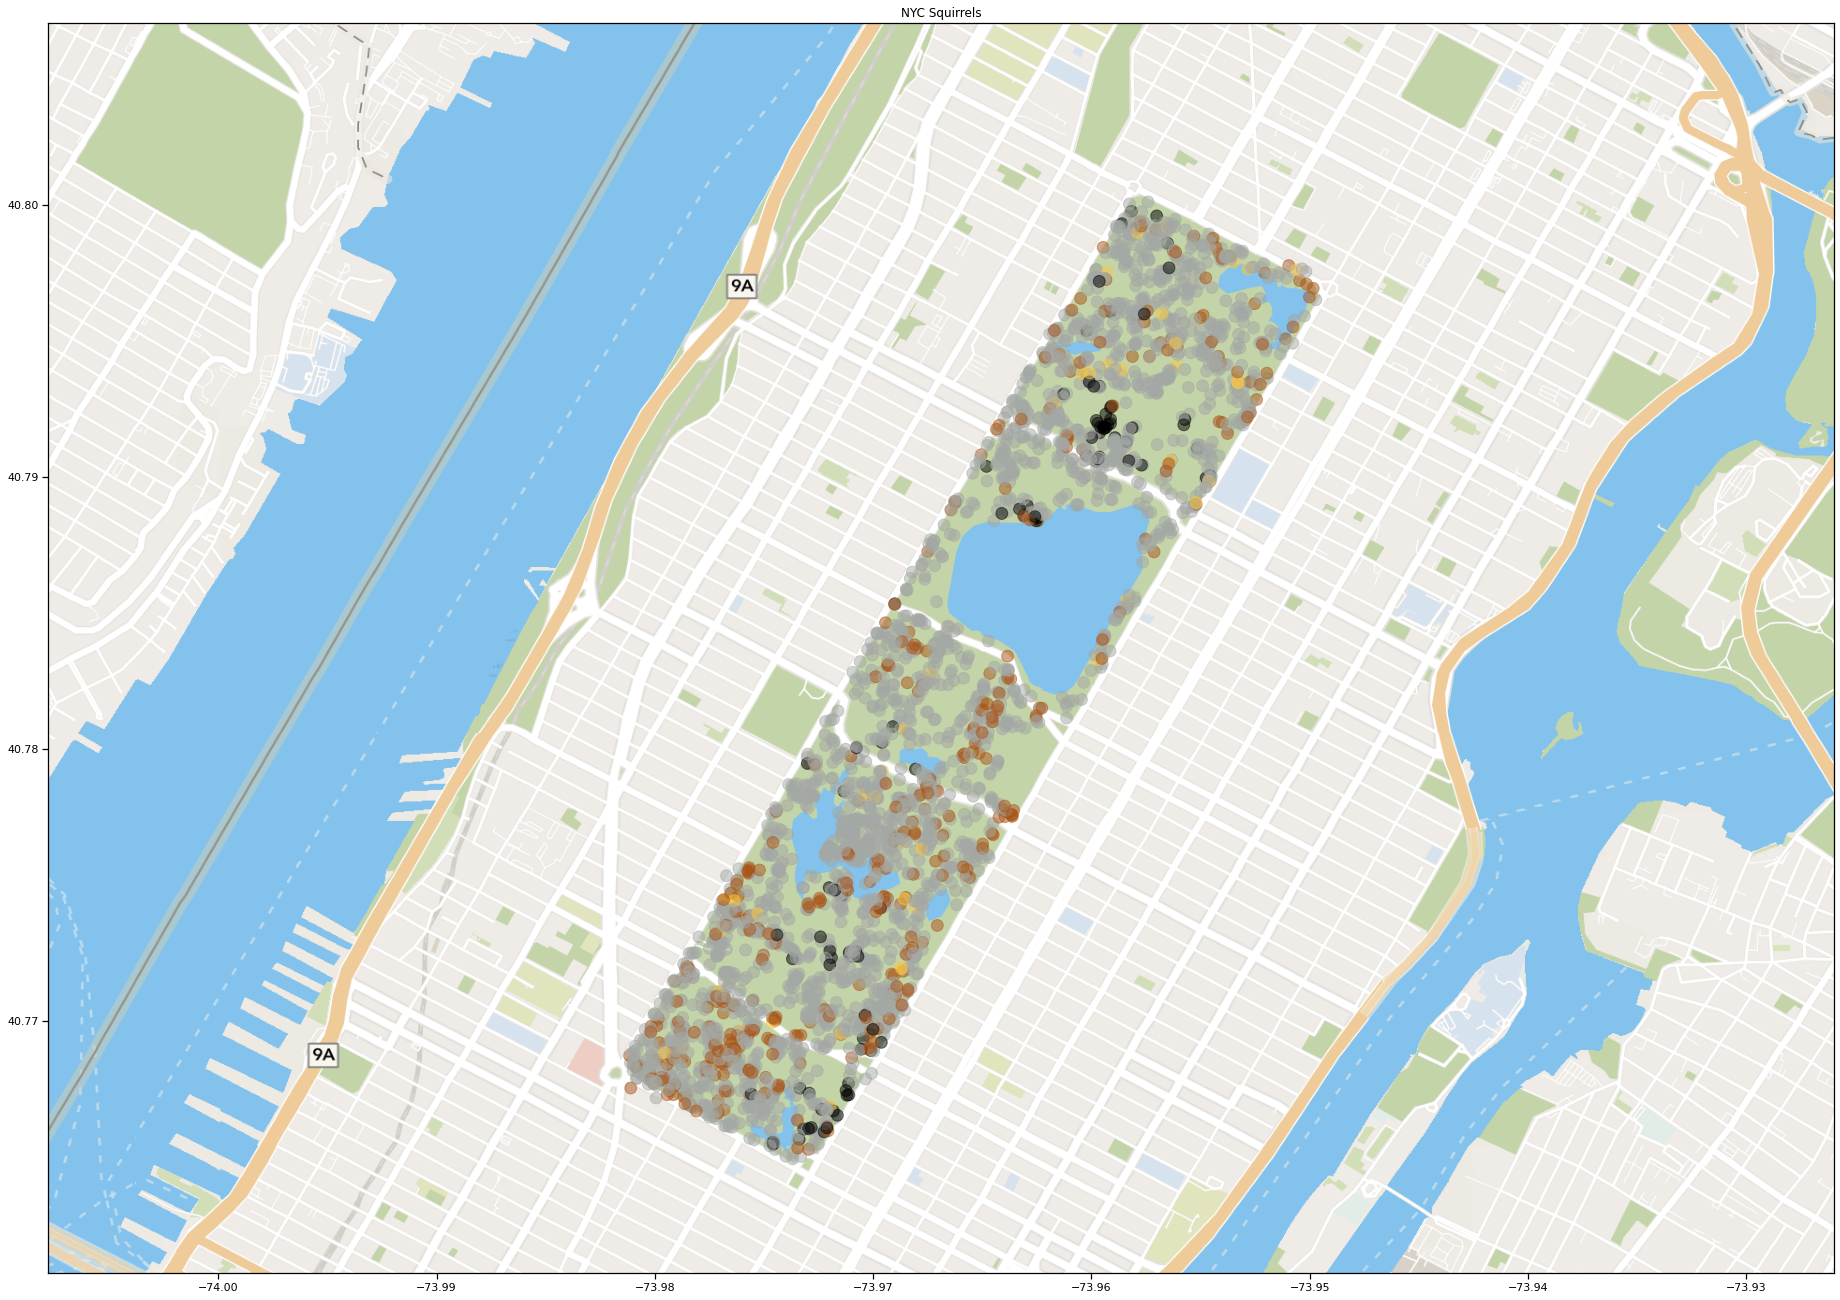

In [64]:
#Plot All the Squirrels
primary_colors = {'Black':'#000000', 'Cinnamon':'#AA5518', 'Gray':'#A4A8A4', 'Unknown':'#FBC740'}

fig, ax = plt.subplots(figsize = (32,23))
ax.scatter(squirrels.X, squirrels.Y, zorder=1, alpha= 0.5, c=squirrels['Primary Fur Color'].map(primary_colors), s=140)
ax.set_title('NYC Squirrels')
ax.set_xlim(bounding_box[0],bounding_box[1])
ax.set_ylim(bounding_box[2],bounding_box[3])
ax.imshow(centralpark, zorder=0, extent = bounding_box, aspect= 'auto')

In [65]:
#Create subset of data without gray squirrels to map
squirrels_nogray = squirrels.loc[squirrels['Primary Fur Color'] != 'Gray']
squirrels_nogray = squirrels_nogray.loc[squirrels_nogray['Primary Fur Color'] != 'Unknown']

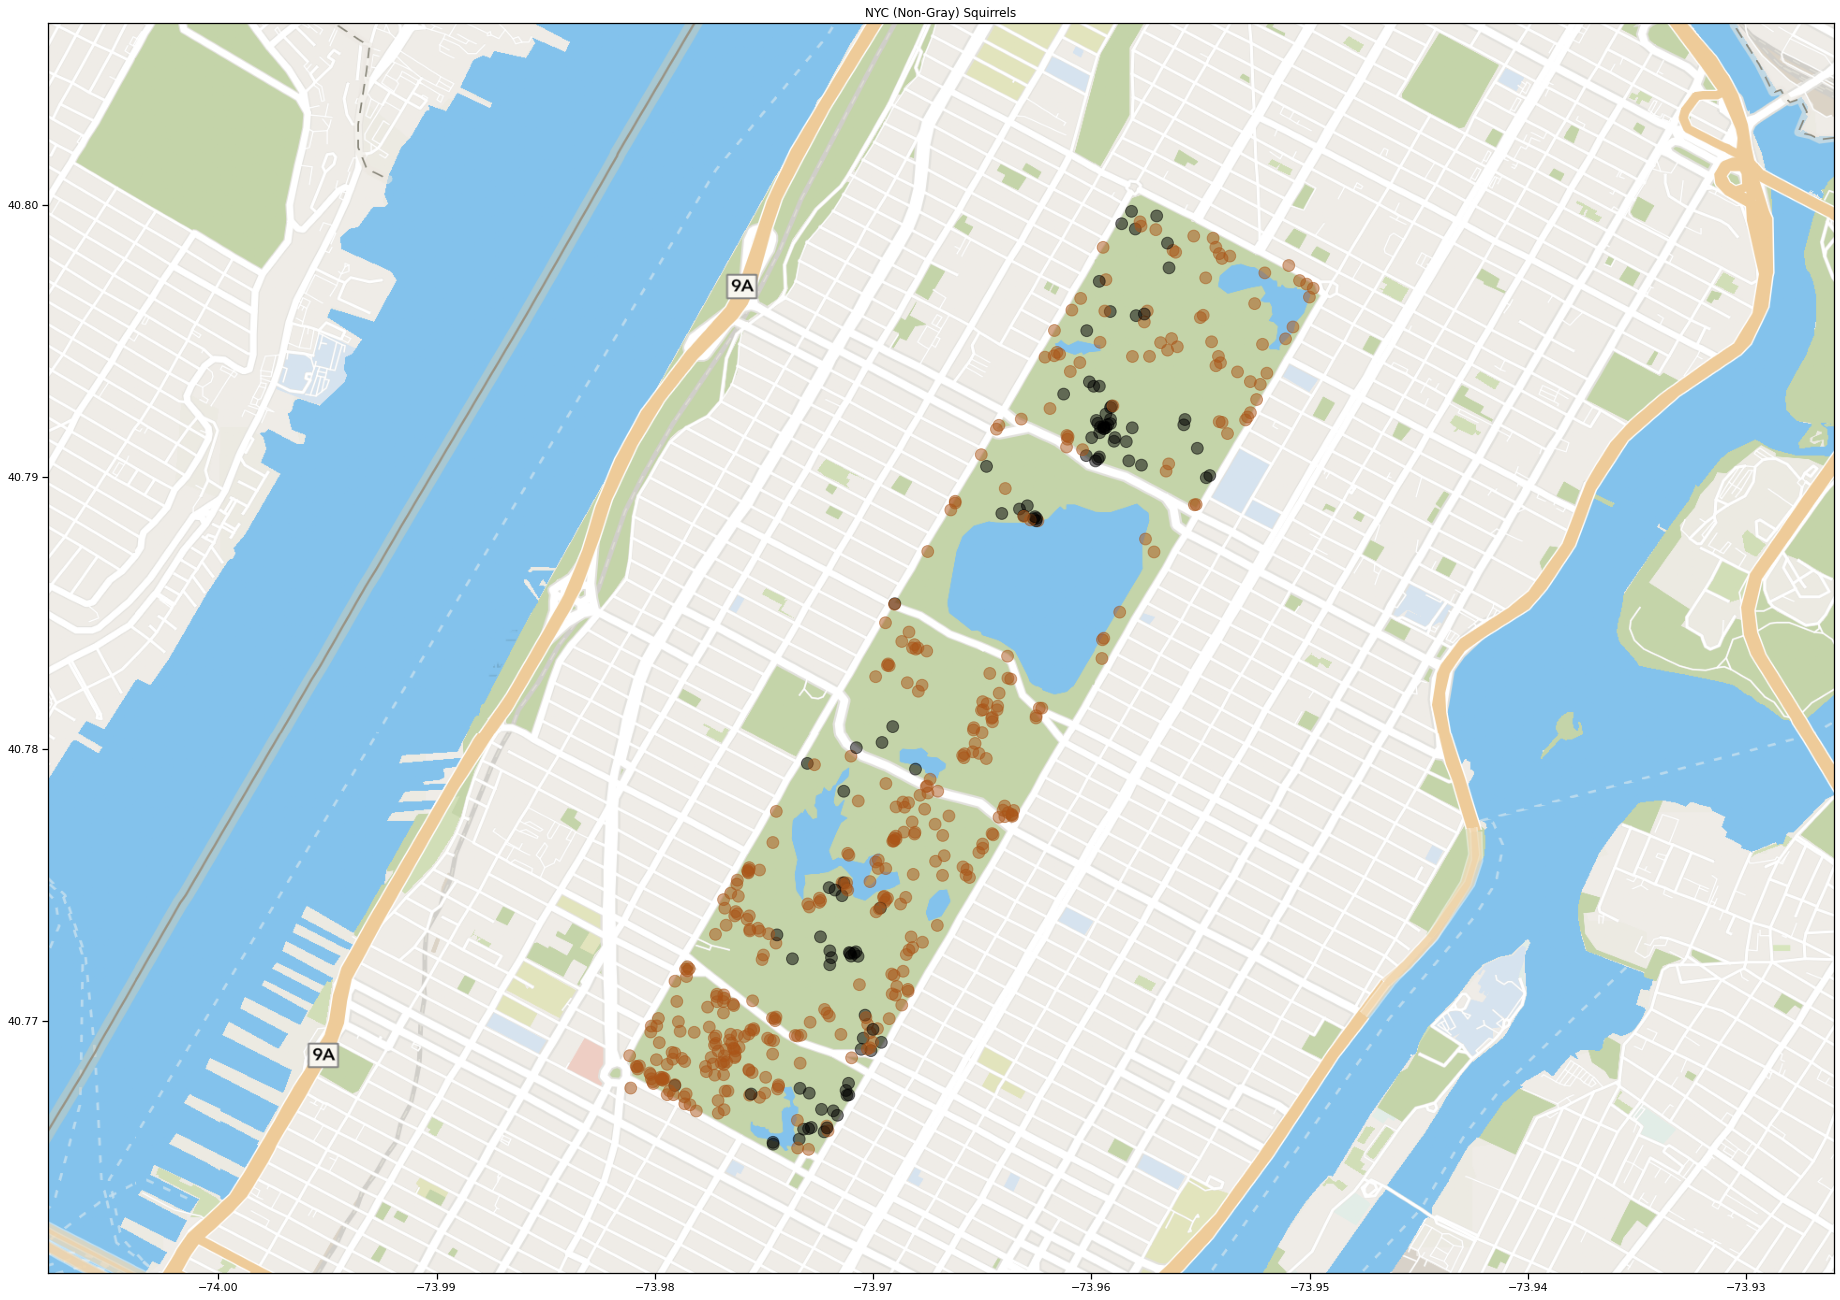

In [66]:
#Plot Non-Gray Squirrels

fig, ax = plt.subplots(figsize = (32,23))
ax.scatter(squirrels_nogray.X, squirrels_nogray.Y, zorder=1, alpha= 0.5, c=squirrels_nogray['Primary Fur Color'].map(primary_colors), s=140)
ax.set_title('NYC (Non-Gray) Squirrels')
ax.set_xlim(bounding_box[0],bounding_box[1])
ax.set_ylim(bounding_box[2],bounding_box[3])
ax.imshow(centralpark, zorder=0, extent = bounding_box, aspect= 'auto')

In [68]:
#Create dataframe summarizing squirrel by park area and primary fur color
park_area = squirrels.groupby(['Park Area','Primary Fur Color'])
by_park_area_primary = park_area.size().to_frame(name='counts')
by_park_area_primary['percent'] = round(by_park_area_primary['counts']/sum(by_park_area_primary['counts']), 3)

by_park_area_primary.index.name = 'fur color'
by_park_area_primary.reset_index(inplace=True)

by_park_area_primary

Park Area Primary Fur Color  counts  percent
0      Lower             Black      42    0.014
1      Lower          Cinnamon     209    0.069
2      Lower              Gray     982    0.325
3      Lower           Unknown      20    0.007
4     Middle             Black      16    0.005
5     Middle          Cinnamon     106    0.035
6     Middle              Gray     681    0.225
7     Middle           Unknown      11    0.004
8      Upper             Black      45    0.015
9      Upper          Cinnamon      77    0.025
10     Upper              Gray     810    0.268
11     Upper           Unknown      24    0.008

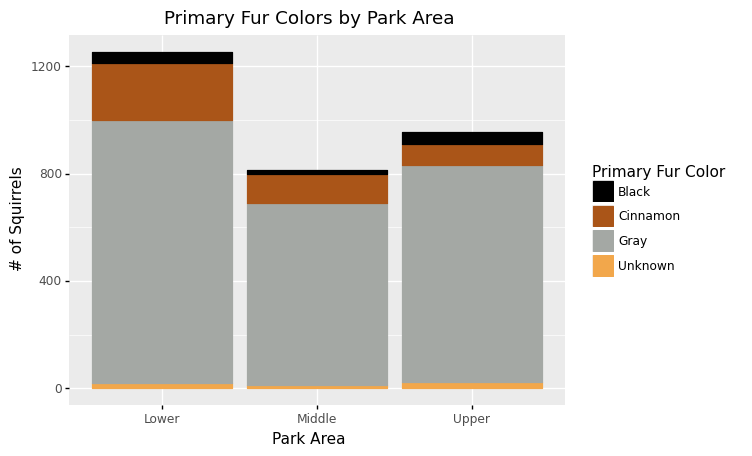

<ggplot: (299750681)>

In [69]:
#Creates Bar Charts Primary Colors by Park Area
primary_fur_colors = ['#000000','#AA5518','#A4A8A4','#f2a74b']

(
    ggplot(by_park_area_primary) 
    + aes(x = 'Park Area', y = 'counts', color='Primary Fur Color', fill = 'Primary Fur Color')
    + geom_bar(position="stack", stat="identity")
    + labs(title="Primary Fur Colors by Park Area", x="Park Area", y = "# of Squirrels") # Change title and labels
    + scale_fill_manual(values=primary_fur_colors)
    + scale_color_manual(values=primary_fur_colors)
)


# Question 2
Is there a section of the park that tends to have more squirrels? How busy were those areas? Were other animals present?

In [70]:
#Create dataframe summarizing squirrels by park area
park_area = squirrels.groupby(['Park Area'])
by_park_area = park_area.size().to_frame(name='counts')
by_park_area['percent'] = round(by_park_area['counts']/sum(by_park_area['counts']), 3)

by_park_area.index.name = 'park area'
by_park_area.reset_index(inplace=True)

by_park_area

park area  counts  percent
0     Lower    1253    0.414
1    Middle     814    0.269
2     Upper     956    0.316

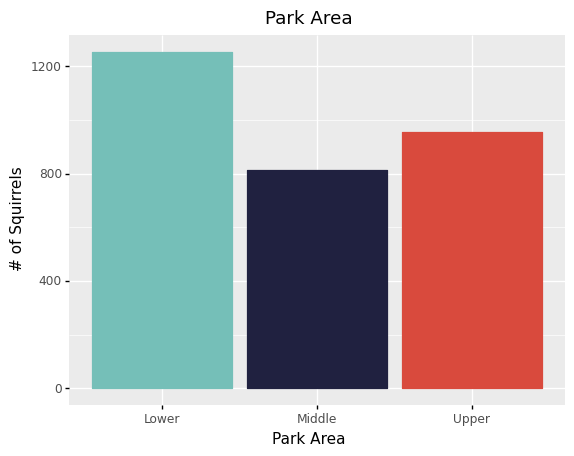

<ggplot: (299616392)>

In [71]:
#Creates Color Scales
park_area_colors = ['#75bfb8','#202140','#d94a3d']

#Putting Park Area Chart into Bar Chart
(
    ggplot(squirrels) 
    + aes(x = 'Park Area', color='Park Area', fill = 'Park Area')
    + geom_bar()
    + labs(title="Park Area", x="Park Area", y = "# of Squirrels") # Change title and labels
    + theme(legend_position = "none") #Remove legend
    + scale_fill_manual(values=park_area_colors)
    + scale_color_manual(values=park_area_colors)
)

In [72]:
#Add Same Column Park Area to Hectare Dataset that was added to Squirrels
hectare['park_area'] = np.where(hectare['hectare'].str.contains('14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29', case=False, regex=True), 'Middle', 'NaN')
hectare['park_area'] = np.where(hectare['hectare'].str.contains('30|31|32|33|34|35|36|37|38|39|40|41|42', case=False, regex=True), 'Upper', hectare['park_area'])
hectare['park_area'] = hectare['park_area'].replace('NaN', 'Lower')

In [73]:
#Creates summarized hectare table
park_area_hect = hectare.groupby(['park_area'])
hect_count = park_area_hect.size().to_frame(name='hectare counts')
by_park_area_hect = ( 
    #Displays the count of hectares in each park area
    hect_count
    #Totals the squirrels in each section of the park
    .join(park_area_hect.agg({'num_squirrels': 'sum'}))
    #Totals the sighters in each section of the park
    .join(park_area_hect.agg({'num_sighters': 'sum'}))
    #Total number of hectares with humans
    .join(park_area_hect.agg({'human_flag': 'sum'}).rename(columns={'human_flag': 'hectares_with_humans'}))
    #Total number of hectares with humans
    .join(park_area_hect.agg({'bird_flag': 'sum'}).rename(columns={'bird_flag': 'hectares_with_birds'}))
    #Total number of hectares with humans
    .join(park_area_hect.agg({'dog_flag': 'sum'}).rename(columns={'dog_flag': 'hectares_with_dogs'}))
    #Total number of hectares with humans
    .join(park_area_hect.agg({'rodent_flag': 'sum'}).rename(columns={'rodent_flag': 'hectares_with_rodents'}))
 )

by_park_area_hect.index.name = 'park_area'
by_park_area_hect.reset_index(inplace=True)

#Add in Percent Columns to Scale Data
by_park_area_hect.insert (5, "percent_with_humans", by_park_area_hect['hectares_with_humans']/by_park_area_hect['hectare counts'])
by_park_area_hect.insert (7, "percent_with_birds", by_park_area_hect['hectares_with_birds']/by_park_area_hect['hectare counts'])
by_park_area_hect.insert (9, "percent_with_dogs", by_park_area_hect['hectares_with_dogs']/by_park_area_hect['hectare counts'])
by_park_area_hect.insert (11, "percent_with_rodents", by_park_area_hect['hectares_with_rodents']/by_park_area_hect['hectare counts'])

by_park_area_hect
    

park_area  hectare counts  num_squirrels  num_sighters  \
0     Lower             234           1252           280   
1    Middle             232            814           266   
2     Upper             234            956           254   

   hectares_with_humans  percent_with_humans  hectares_with_birds  \
0                   223             0.952991                  128   
1                   206             0.887931                  125   
2                   207             0.884615                  126   

   percent_with_birds  hectares_with_dogs  percent_with_dogs  \
0            0.547009                 179           0.764957   
1            0.538793                 175           0.754310   
2            0.538462                 171           0.730769   

   hectares_with_rodents  percent_with_rodents  
0                     12              0.051282  
1                     11              0.047414  
2                     43              0.183761

In [74]:
by_park_area_hect_melt = by_park_area_hect
del by_park_area_hect_melt['percent_with_humans']
del by_park_area_hect_melt['percent_with_birds']
del by_park_area_hect_melt['percent_with_dogs']
del by_park_area_hect_melt['percent_with_rodents']

In [75]:
#Rename Columms
by_park_area_hect_melt.columns = ['park_area', 'hectare_counts', 'num_squirrels', 'num_sighters', 'humans', 'birds','dogs','rodents']
#Create Melted Table
by_park_area_hect_melt = pd.melt(by_park_area_hect_melt, id_vars=['park_area', 'hectare_counts', 'num_squirrels', 'num_sighters'], var_name='animals')


In [76]:
del by_park_area_hect_melt['num_sighters']

by_park_area_hect_melt.sort_values(by='park_area', ascending=True)

park_area  hectare_counts  num_squirrels  animals  value
0      Lower             234           1252   humans    223
3      Lower             234           1252    birds    128
6      Lower             234           1252     dogs    179
9      Lower             234           1252  rodents     12
1     Middle             232            814   humans    206
4     Middle             232            814    birds    125
7     Middle             232            814     dogs    175
10    Middle             232            814  rodents     11
2      Upper             234            956   humans    207
5      Upper             234            956    birds    126
8      Upper             234            956     dogs    171
11     Upper             234            956  rodents     43

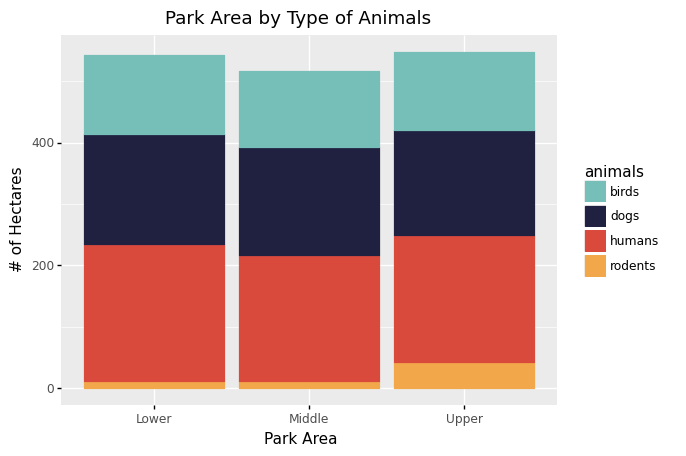

<ggplot: (301104372)>

In [77]:
#Creates Color Scales
animal_colors = ['#75bfb8','#202140','#d94a3d','#f2a74b']

#Putting Park Area Chart into Bar Chart
(
    ggplot(by_park_area_hect_melt) 
    + aes(x = 'park_area', y = 'value', color='animals', fill = 'animals')
    + geom_bar(stat="identity")
    + labs(title="Park Area by Type of Animals ", x="Park Area", y = "# of Hectares") # Change title and labels
    + scale_fill_manual(values=animal_colors)
    + scale_color_manual(values=animal_colors)
)

# Question 3

Is there a relationship between the number of squirrels seen and the time of day? Does the weather at the time have any influence?

In [78]:
# Create dataframe summarizing number of squirrels by time of day
by_time = hectare.groupby(['shift']).sum()
by_time.reset_index(inplace=True)

# Remove unneeded columns
del by_time['num_sighters']
del by_time['temperature ºF']
del by_time['human_flag']
del by_time['bird_flag']
del by_time['dog_flag']
del by_time['rodent_flag']

by_time

shift  num_squirrels
0    AM           1347
1    PM           1675

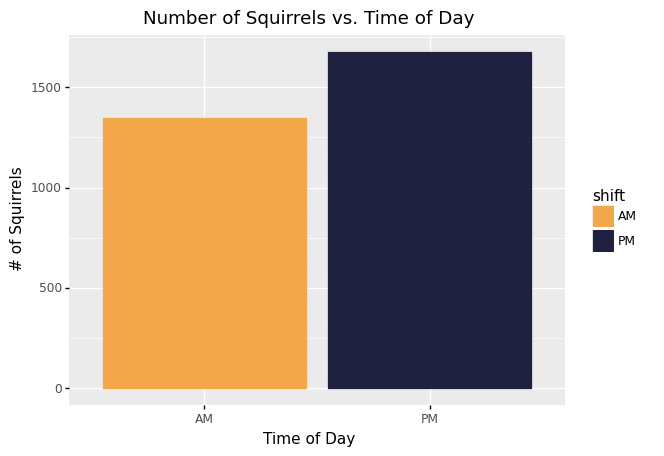

<ggplot: (299625500)>

In [79]:
# Create bar chart of number of squirrels by time of day

# Creates color scales
time_of_day_colors = ['#f2a74b','#202140']


(
    ggplot(hectare) 
    + aes(x = 'shift', y = 'num_squirrels', color='shift', fill = 'shift')
    + geom_bar(position="stack", stat="identity")
    + labs(title="Number of Squirrels vs. Time of Day", x="Time of Day", y = "# of Squirrels") # Change title and labels
    + scale_fill_manual(values=time_of_day_colors)
    + scale_color_manual(values=time_of_day_colors)
)


In [80]:
# Create dataframe summarizing number of squirrels by weather condition
by_weather = hectare.groupby(['weather_condition']).sum()
by_weather.reset_index(inplace=True)

# Remove unneeded columns
del by_weather['num_sighters']
del by_weather['temperature ºF']
del by_weather['human_flag']
del by_weather['bird_flag']
del by_weather['dog_flag']
del by_weather['rodent_flag']

by_weather

weather_condition  num_squirrels
0            cloudy           1143
1             other            904
2             rainy            304
3             sunny            671

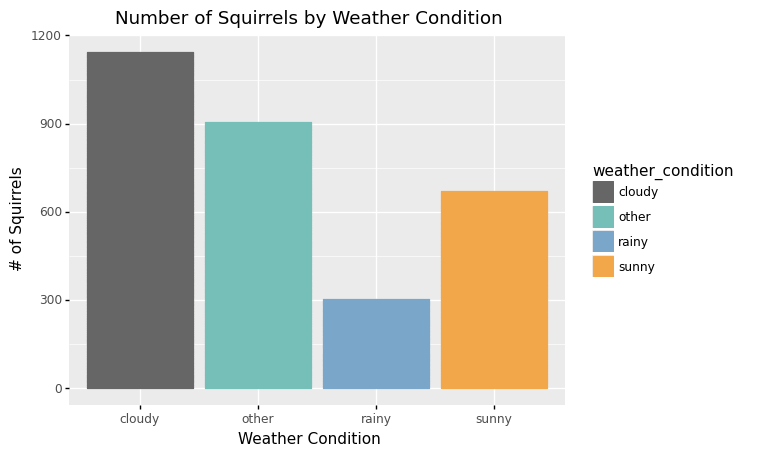

<ggplot: (300186522)>

In [81]:
# Creates color scales
weather_condition_colors = ['#666666', '#75bfb8', '#7AA7C9','#f2a74b']


# Create bar chart of number of squirrels by weather condition
(
    ggplot(hectare) 
    + aes(x = 'weather_condition', y = 'num_squirrels', color='weather_condition', fill = 'weather_condition')
    + geom_bar(position="stack", stat="identity")
    + labs(title="Number of Squirrels by Weather Condition", x="Weather Condition", y = "# of Squirrels") # Change title and labels
    + scale_fill_manual(values=weather_condition_colors)
    + scale_color_manual(values=weather_condition_colors)
)


In [82]:
# Create dataframe summarizing number of squirrels by weather condition and shift
by_weather_and_time = hectare.groupby(['weather_condition','shift']).sum()
by_weather_and_time.reset_index(inplace=True)

# Remove unneeded columns
del by_weather_and_time['num_sighters']
del by_weather_and_time['temperature ºF']
del by_weather_and_time['human_flag']
del by_weather_and_time['bird_flag']
del by_weather_and_time['dog_flag']
del by_weather_and_time['rodent_flag']

by_weather_and_time

weather_condition shift  num_squirrels
0            cloudy    AM            420
1            cloudy    PM            723
2             other    AM            418
3             other    PM            486
4             rainy    AM            222
5             rainy    PM             82
6             sunny    AM            287
7             sunny    PM            384

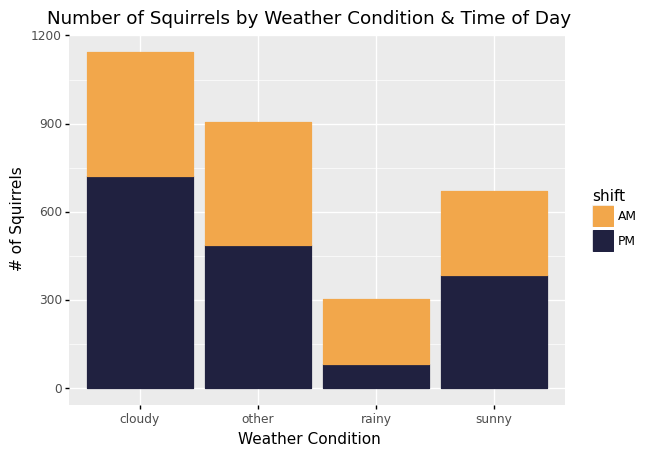

<ggplot: (308691080)>

In [83]:
# Creates color scales
weather_condition_colors = ['#f2a74b','#202140']


# Create bar chart of number of squirrels by weather condition by shift
(
    ggplot(by_weather_and_time) 
    + aes(x = 'weather_condition', y = 'num_squirrels', color='shift', fill = 'shift')
    + geom_bar(position="stack", stat="identity")
    + labs(title="Number of Squirrels by Weather Condition & Time of Day", x="Weather Condition", y = "# of Squirrels") # Change title and labels
    + scale_fill_manual(values=weather_condition_colors)
    + scale_color_manual(values=weather_condition_colors)
)

In [84]:
# Print min/max temperature to determine ranges
print(min(hectare['temperature ºF']))
print(max(hectare['temperature ºF']))

30.0
84.0


In [85]:
# Create list to store temp ranges
temp_ranges = []

# Split out temperature ranges and append to list 'temp_ranges'
for temp in hectare['temperature ºF']:
    if temp>=40.0 and temp<50.0:
        temp_ranges.append("40s")
    elif temp>=50.0 and temp<60.0:
        temp_ranges.append("50s")
    elif temp>=60.0 and temp<70.0:
        temp_ranges.append("60s")
    elif temp>=70.0 and temp<80.0:
        temp_ranges.append("70s")
    else:
        temp_ranges.append("80s")
        
# Add temp_ranges as column to hectare dataframe
hectare['temp_range'] = temp_ranges

In [86]:
# Create dataframe summarizing number of squirrels by temperature range
by_temp = hectare.groupby(['temp_range']).sum()
by_temp.reset_index(inplace=True)

# Remove unneeded columns
del by_temp['num_sighters']
del by_temp['human_flag']
del by_temp['temperature ºF']
del by_temp['bird_flag']
del by_temp['dog_flag']
del by_temp['rodent_flag']

by_temp

temp_range  num_squirrels
0        40s            217
1        50s            953
2        60s           1132
3        70s            570
4        80s            150

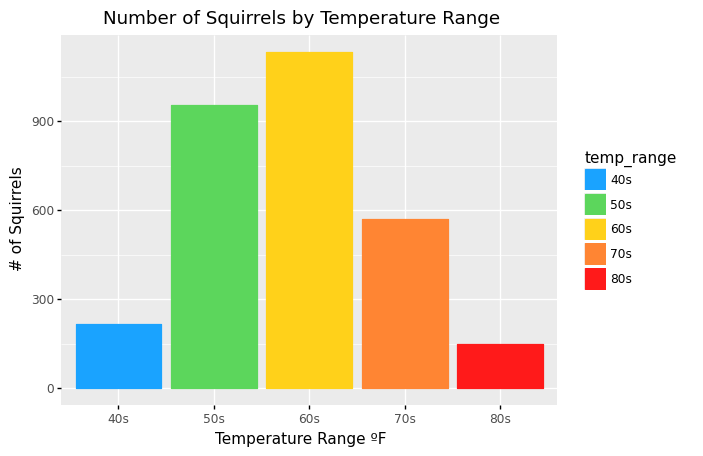

<ggplot: (301248181)>

In [87]:
# Creates color scales
temperature_range_colors = ['#1aa3ff', '#5cd65c', '#ffd11a','#ff8533','#ff1a1a']

# Create bar chart of number of squirrels by temperature range
(
    ggplot(by_temp) 
    + aes(x = 'temp_range', y = 'num_squirrels', color='temp_range', fill = 'temp_range')
    + geom_bar(position="stack", stat="identity")
    + labs(title="Number of Squirrels by Temperature Range", x="Temperature Range ºF", y = "# of Squirrels") # Change title and labels
    + scale_fill_manual(values=temperature_range_colors)
    + scale_color_manual(values=temperature_range_colors)
)

# Question 4

What verbal noises were most popular? What behaviors are most common? How does these distribute around the park?

In [88]:
#Creates frame to analyze behaviors
behaviors = squirrels
behaviors.head()

X          Y Hectare      Age Primary Fur Color  \
0 -73.956134  40.794082     37F  Unknown           Unknown   
1 -73.968857  40.783783     21B  Unknown           Unknown   
2 -73.974281  40.775534     11B  Unknown              Gray   
3 -73.959641  40.790313     32E    Adult              Gray   
4 -73.970268  40.776213     13E    Adult              Gray   

  Highlight Fur Color  Running  Chasing  Climbing  Eating  Foraging  Kuks  \
0                None        0        0         0       0         0     0   
1                None        0        0         0       0         0     0   
2                None        0        1         0       0         0     0   
3                None        0        0         0       1         1     0   
4            Cinnamon        0        0         0       0         1     0   

   Quaas  Moans  Tail flags  Tail twitches  Approaches  Indifferent  \
0      0      0           0              0           0            0   
1      0      0           0              0           0            0   
2      0      0           0              0           0            0   
3      0      0           0              0           0            0   
4      0      0           0              0           0            0   

   Runs from Park Area  
0          0     Upper  
1          0    Middle  
2          0     Lower  
3          1     Upper  
4          0     Lower

In [89]:
#Creates categorical column
behaviors["Sound"] = ""
behaviors.loc[behaviors['Kuks']==1, 'Sound'] = "Kuk" 
behaviors.loc[behaviors['Quaas']==1, 'Sound'] = "Quaa" 
behaviors.loc[behaviors['Moans']==1, 'Sound'] = "Moan"

In [90]:
behaviors['Sound'].replace('', np.nan, inplace=True)
behaviors.dropna(subset=['Sound'], inplace=True)

In [91]:
#Creates count frame
Sounds = behaviors.groupby(['Sound'])
By_Sounds = Sounds.size().to_frame(name='counts')
By_Sounds['percent'] = round(By_Sounds['counts']/sum(By_Sounds['counts']), 2)


By_Sounds.index.name = 'Sound'
By_Sounds.reset_index(inplace=True)

By_Sounds

Sound  counts  percent
0   Kuk      87     0.63
1  Moan       3     0.02
2  Quaa      49     0.35

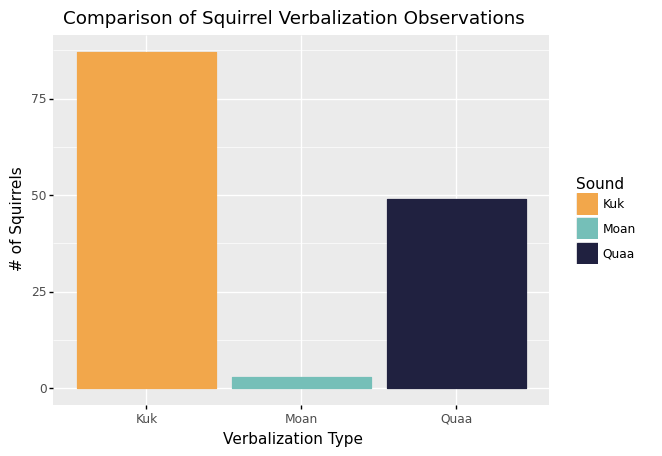

<ggplot: (302167287)>

In [92]:
# Creates color scales
sound_colors = ['#f2a74b', '#75bfb8', '#202140']


# Create bar chart of number of squirrel noises
(
    ggplot(By_Sounds) 
    + aes(x = 'Sound', y = 'counts',color='Sound', fill = 'Sound')
    + geom_bar(stat="identity")
    + labs(title="Comparison of Squirrel Verbalization Observations", x="Verbalization Type", y = "# of Squirrels") # Change title and labels
    + scale_fill_manual(values=sound_colors)
    + scale_color_manual(values=sound_colors)
)

In [93]:
#Create Behaviors Count DF
Behaviors = pd.DataFrame()
  
# append columns to an empty DataFrame
Behaviors['Behaviors'] = ['Tail flags', 'Tail twitches', 'Approaches', 'Indifferent','Runs from']
Behaviors['Counts'] = [behaviors['Tail flags'].sum(), behaviors['Tail twitches'].sum(), behaviors['Approaches'].sum(), behaviors['Indifferent'].sum(), behaviors['Runs from'].sum()]

Behaviors

Behaviors  Counts
0     Tail flags      18
1  Tail twitches      17
2     Approaches       4
3    Indifferent      43
4      Runs from      39

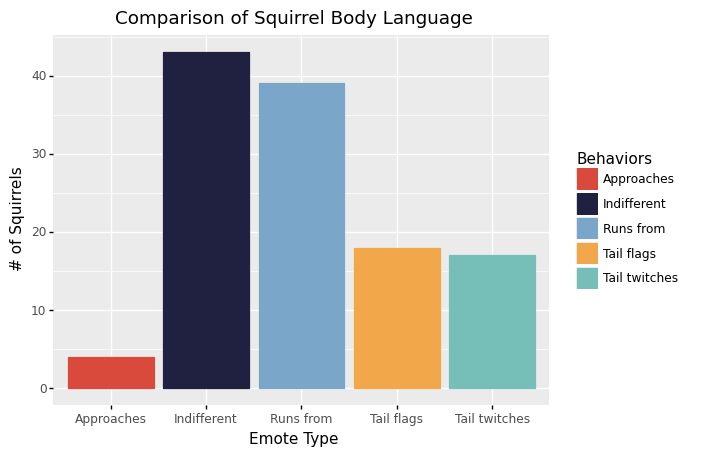

<ggplot: (302223077)>

In [94]:
behavior_colors = [ '#d94a3d', '#202140','#7AA7C9', '#f2a74b', '#75bfb8']

# Create bar chart of number of squirrels by weather condition
(
    ggplot(Behaviors) 
    + aes(x = 'Behaviors', y = 'Counts',color='Behaviors', fill = 'Behaviors')
    + geom_bar(position="stack", stat="identity")
    + labs(title="Comparison of Squirrel Body Language", x="Emote Type", y = "# of Squirrels") # Change title and labels
    + scale_fill_manual(values=behavior_colors)
    + scale_color_manual(values=behavior_colors)
)

In [95]:
squirrel_noises = squirrels[['X', 'Y', 'Kuks', "Quaas", 'Moans']].copy()

#Create Melted Table
squirrel_noises_melt = pd.melt(squirrel_noises, id_vars=['X', 'Y'], var_name='noises')

#Remove zeros
squirrel_noises_melt = squirrel_noises_melt[squirrel_noises_melt.value != 0]


In [96]:
squirrel_noises_melt

X          Y noises  value
0   -73.970182  40.776653   Kuks      1
2   -73.954401  40.795069   Kuks      1
3   -73.967115  40.777262   Kuks      1
5   -73.976343  40.768635   Kuks      1
7   -73.957053  40.799097   Kuks      1
..         ...        ...    ...    ...
272 -73.974731  40.767732  Quaas      1
274 -73.967790  40.782656  Quaas      1
305 -73.952229  40.797699  Moans      1
326 -73.967741  40.776358  Moans      1
406 -73.961543  40.790742  Moans      1

[155 rows x 4 columns]

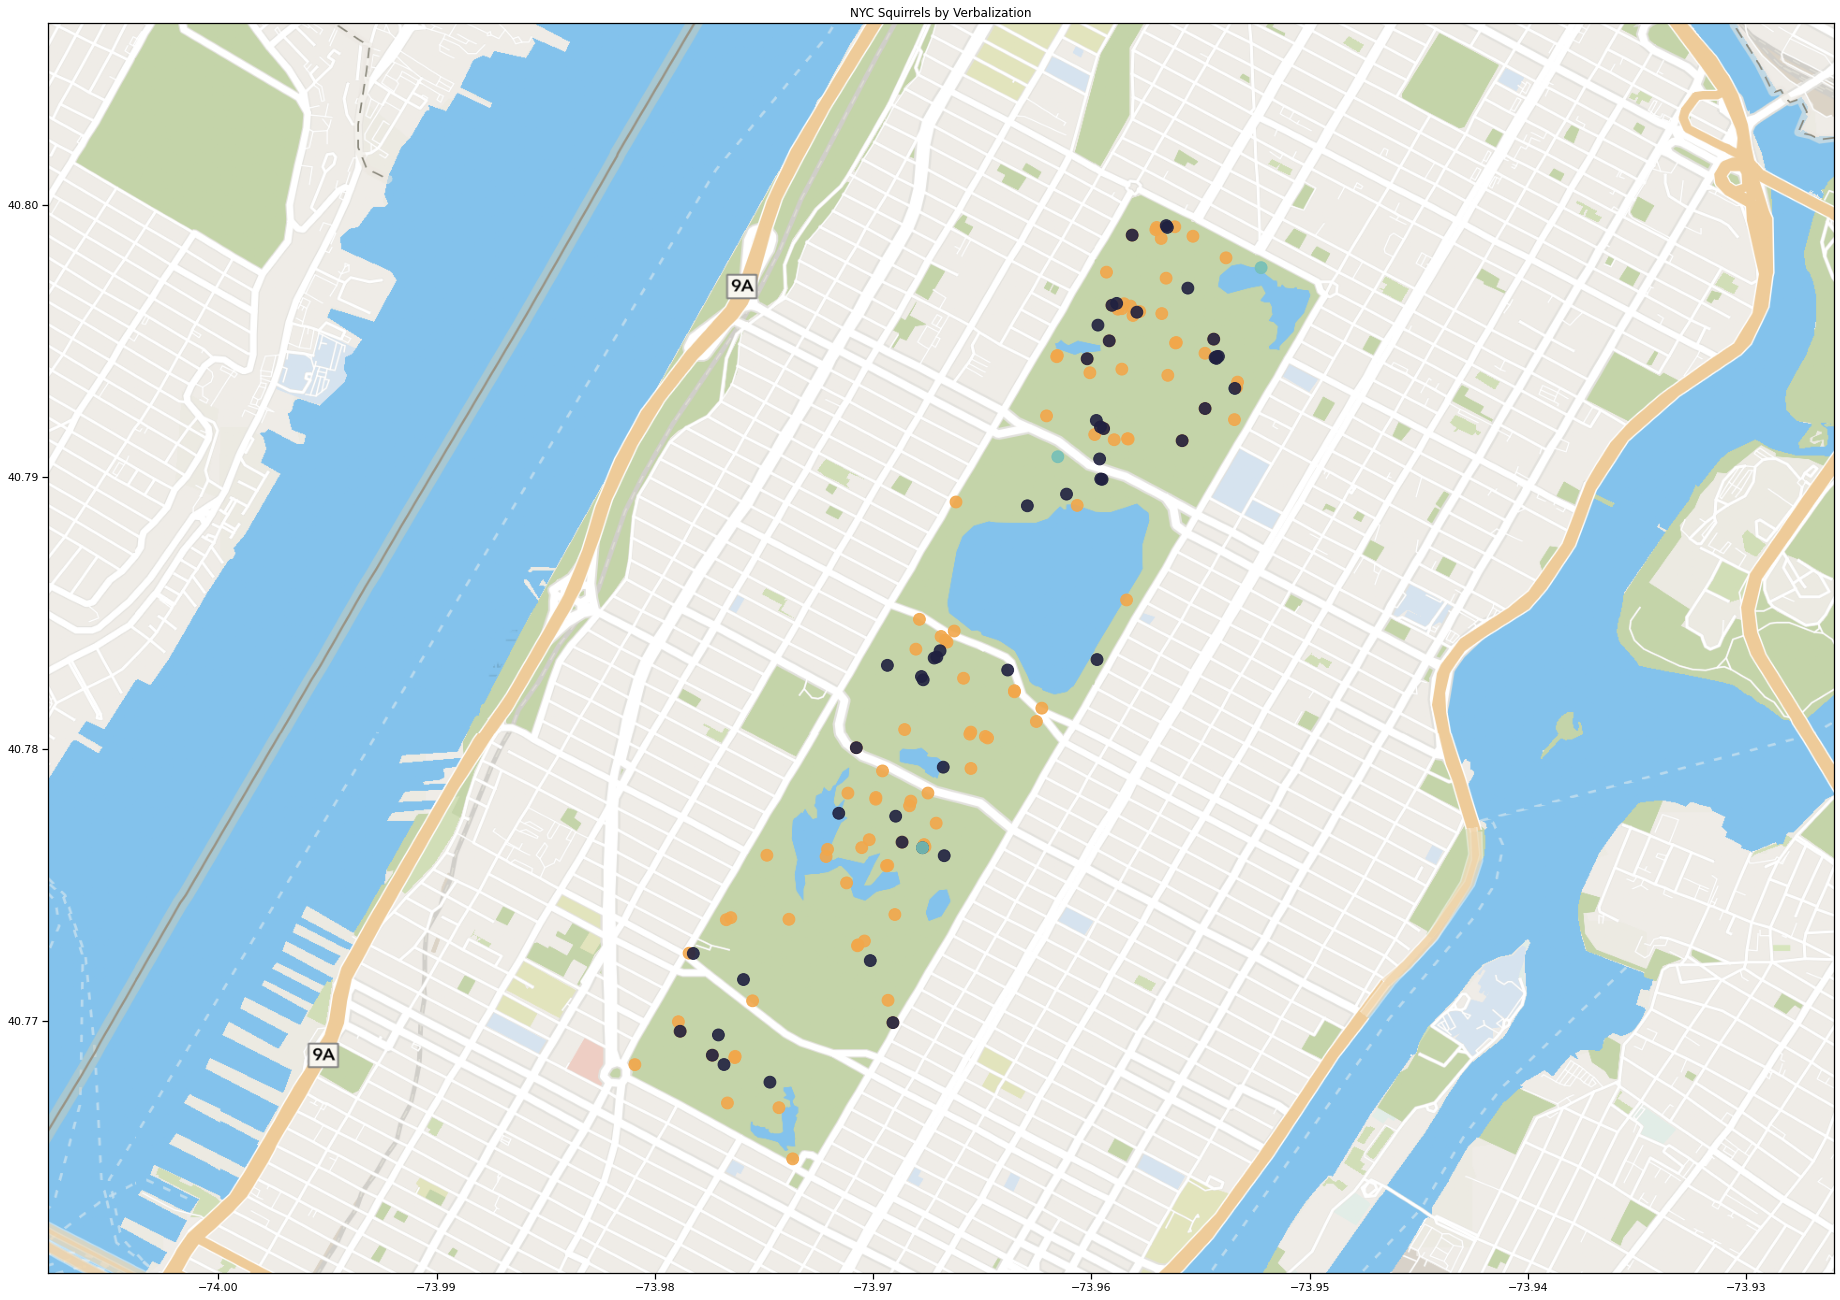

In [97]:
#Plot All the Squirrels
primary_colors = {'Kuks':'#f2a74b', 'Quaas':'#202140', 'Moans':'#75bfb8'}

fig, ax = plt.subplots(figsize = (32,23))
ax.scatter(squirrel_noises_melt.X, squirrel_noises_melt.Y, zorder=1, alpha= 0.9, c=squirrel_noises_melt['noises'].map(primary_colors), s=140)
ax.set_title('NYC Squirrels by Verbalization')
ax.set_xlim(bounding_box[0],bounding_box[1])
ax.set_ylim(bounding_box[2],bounding_box[3])
ax.imshow(centralpark, zorder=0, extent = bounding_box, aspect= 'auto')

In [98]:
#Aggregate Sounds to Total Column
SquirSounds = squirrels[["Hectare", "Kuks","Quaas","Moans"]]
SquirSounds["TotalSounds"] = SquirSounds.sum(axis=1)
SquirSounds = SquirSounds[["Hectare","TotalSounds"]]
SquirSounds

Hectare  TotalSounds
79       14E            1
87       42C            1
96       38F            2
119      16G            1
133      07A            1
...      ...          ...
2819     35B            1
2932     21C            1
2959     21H            1
3010     23B            1
3016     23C            1

[139 rows x 2 columns]

In [99]:
#Aggregate Behaviors to Total Column
SquirBehaviors = squirrels[["Hectare", "Tail flags","Tail twitches","Approaches","Indifferent","Runs from"]]
SquirBehaviors["TotalBehaviors"] = SquirBehaviors.sum(axis=1)
SquirBehaviors = SquirBehaviors[["Hectare", "TotalBehaviors"]]
SquirBehaviors

Hectare  TotalBehaviors
79       14E               1
87       42C               0
96       38F               0
119      16G               1
133      07A               1
...      ...             ...
2819     35B               1
2932     21C               0
2959     21H               1
3010     23B               0
3016     23C               1

[139 rows x 2 columns]

In [100]:
#Aggregate Other Animal to Total Column
OtherAnimals = hectare[['hectare','bird_flag', 'dog_flag','rodent_flag']]
OtherAnimals.rename(columns={'hectare':'Hectare'}, inplace=True)
OtherAnimals["TotalOtherAnimals"] = OtherAnimals.sum(axis=1)
OtherAnimals = OtherAnimals[['Hectare','TotalOtherAnimals']]
OtherAnimals

Hectare  TotalOtherAnimals
0       01A                  1
1       01A                  1
2       01B                  2
3       01B                  2
4       01C                  2
..      ...                ...
695     09A                  3
696     11F                  2
697     12G                  1
698     12H                  1
699     26A                  0

[700 rows x 2 columns]

In [101]:
#Join frames together for correlation analysis
frames = [SquirSounds,SquirBehaviors,OtherAnimals]
SquirInteractions = pd.concat(frames, axis=1,join="inner")

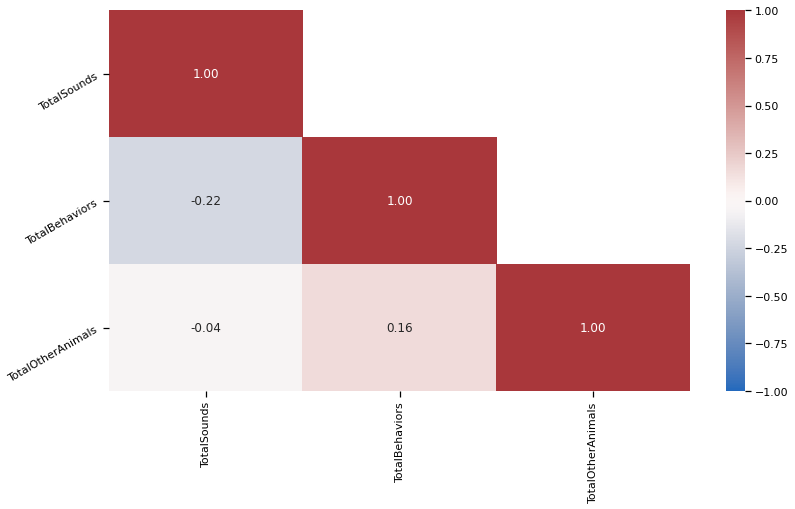

In [102]:
#Create Correlation Analysis of Sounds, Behaviors & Other Animal "Interactions"
# Create correlation plot for hectare portion of dataset

import seaborn as sns
corr=SquirInteractions.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))

# Create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f',cmap="vlag",vmin=-1, vmax=1)
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)